## Importing Libraries & Data

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [4]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
data.shape

(200, 5)

## Explore Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [9]:
data.describe(include='O').transpose()

count unique     top freq
Gender   200      2  Female  112

## Check Null Values

In [10]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Duplicated values

In [11]:
data[data.duplicated()]

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []

## Data Analysis & Visualization

In [12]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

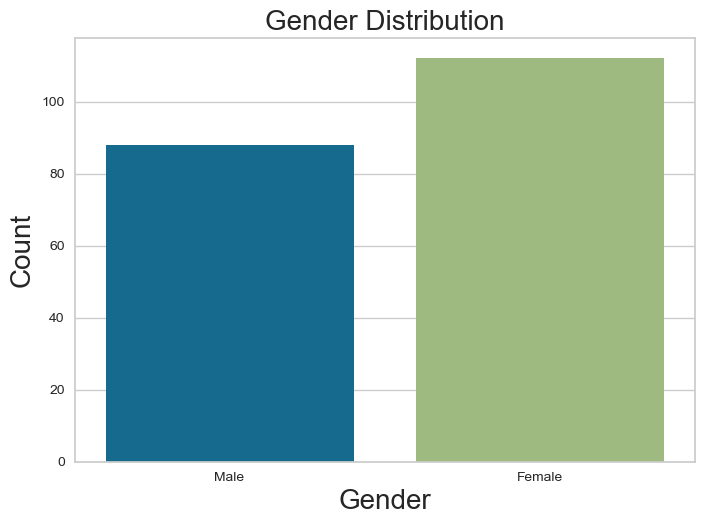

In [13]:
data.Gender.value_counts()
sns.countplot(x=data.Gender)
plt.title('Gender Distribution',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

D:\Project\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


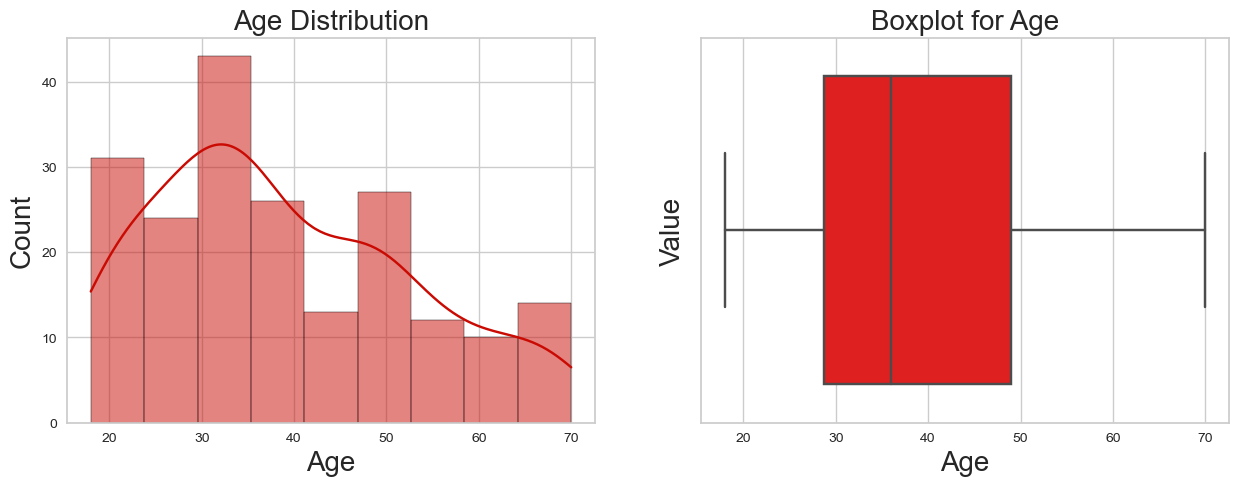

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Age Distribution',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
sns.histplot(data['Age'],kde=True,color='r')
plt.subplot(1,2,2)
sns.boxplot(data['Age'],color='red')
plt.title('Boxplot for Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.show()

D:\Project\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


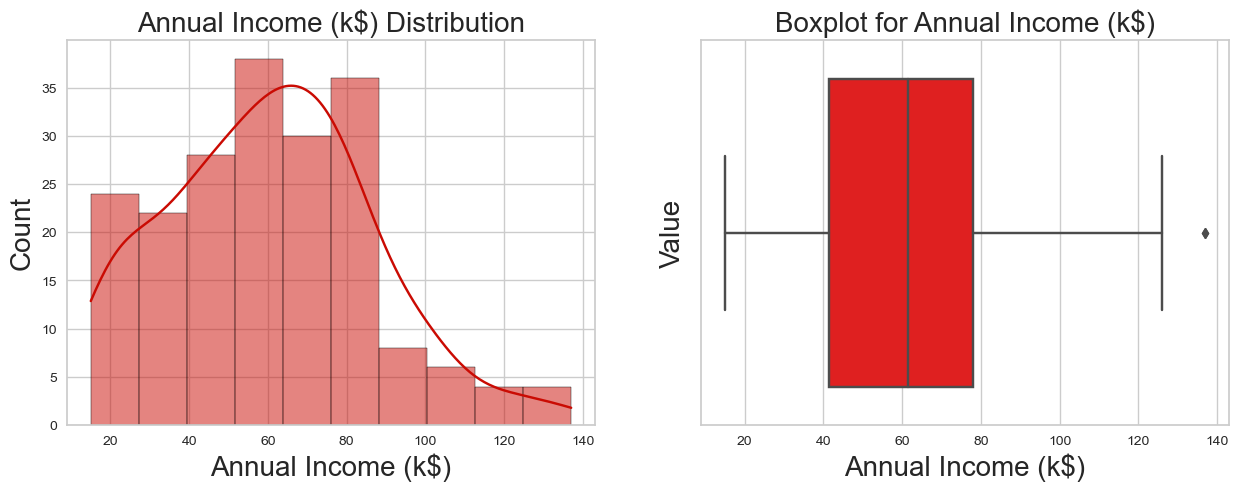

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Annual Income (k$) Distribution',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Count',fontsize=20)
sns.histplot(data['Annual Income (k$)'],kde=True,color='r')
plt.subplot(1,2,2)
sns.boxplot(data['Annual Income (k$)'],color='red')
plt.title('Boxplot for Annual Income (k$)',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.show()

D:\Project\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


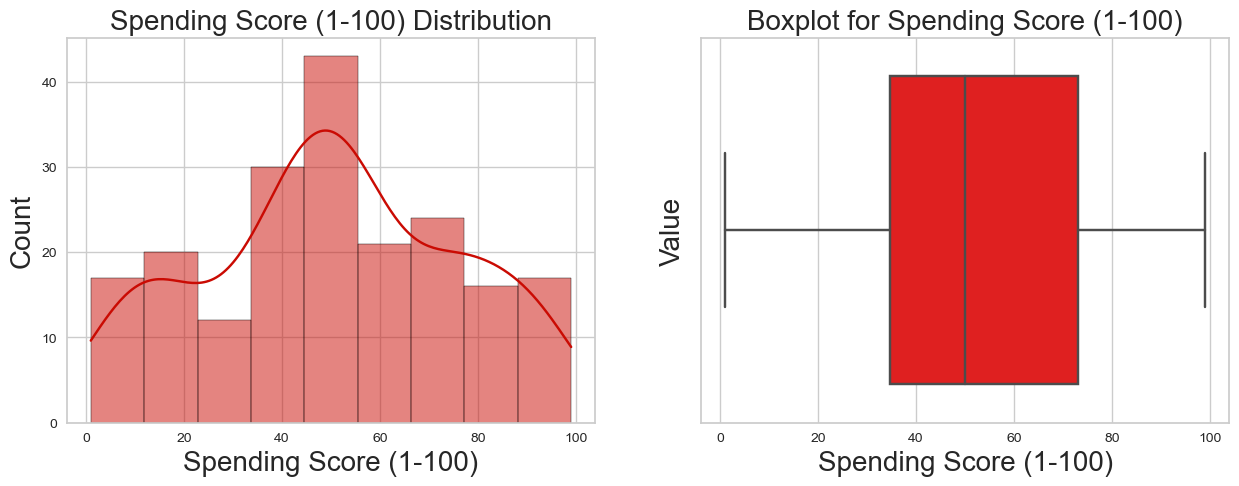

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Spending Score (1-100) Distribution',fontsize=20)
plt.xlabel('Spending Score (1-100)',fontsize=20)
plt.ylabel('Count',fontsize=20)
sns.histplot(data['Spending Score (1-100)'],kde=True,color='r')
plt.subplot(1,2,2)
sns.boxplot(data['Spending Score (1-100)'],color='red')
plt.title('Boxplot for Spending Score (1-100)',fontsize=20)
plt.xlabel('Spending Score (1-100)',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.show()

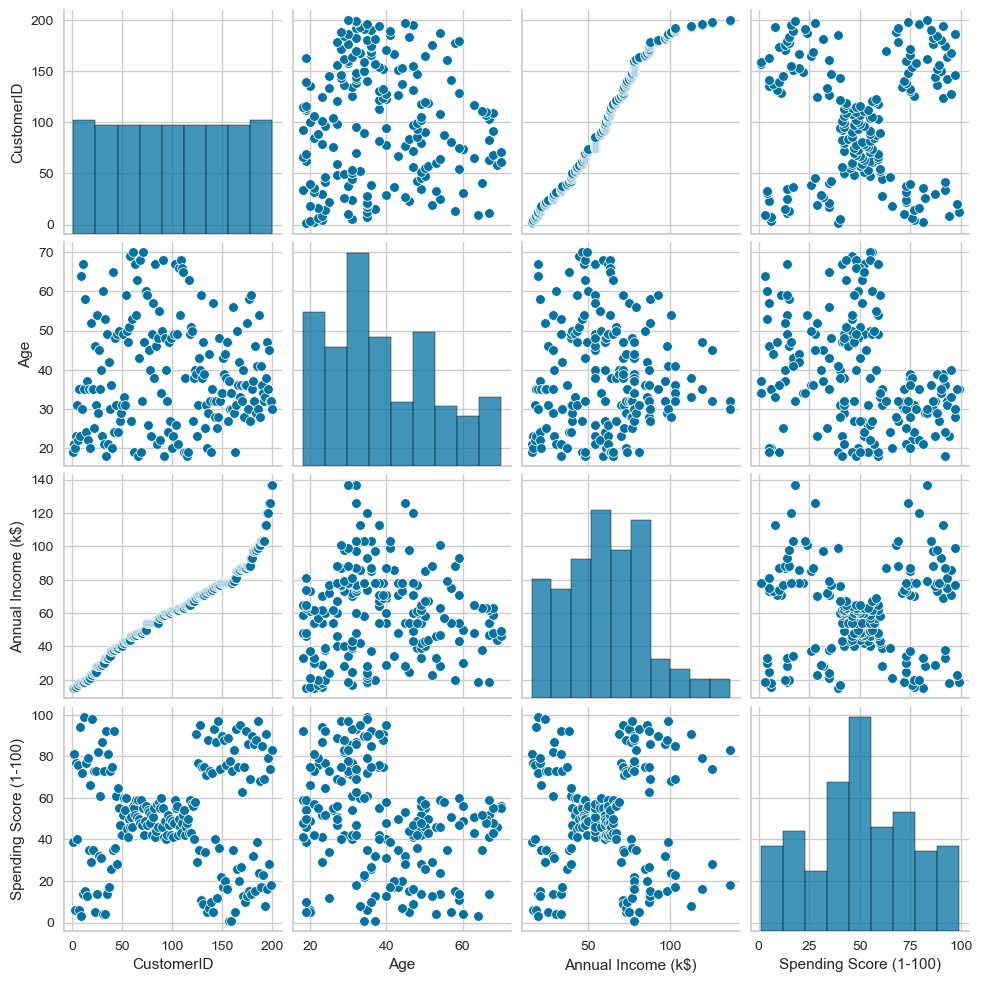

In [17]:
sns.pairplot(data = data)

## Model Construction

For Feature Annual Income (k$)	Spending Score (1-100)

In [18]:
X=data.iloc[:,3:]
X

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

In [21]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

In [22]:
wcss = []
n=20
for i in range(1,n):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=44)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)
wcss

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[250356.57222222222,
 167678.7786917352,
 98196.35224510224,
 66605.8532043067,
 41448.34246328548,
 34470.69471553773,
 27685.401475512892,
 22837.14414735591,
 19817.613527450292,
 18372.88684121326,
 15818.992891453481,
 14334.740189008866,
 13545.63888148888,
 11949.921612732202,
 10713.469057745373,
 9801.762205046414,
 8843.060149994933,
 8324.643931068931,
 7517.042574092575]

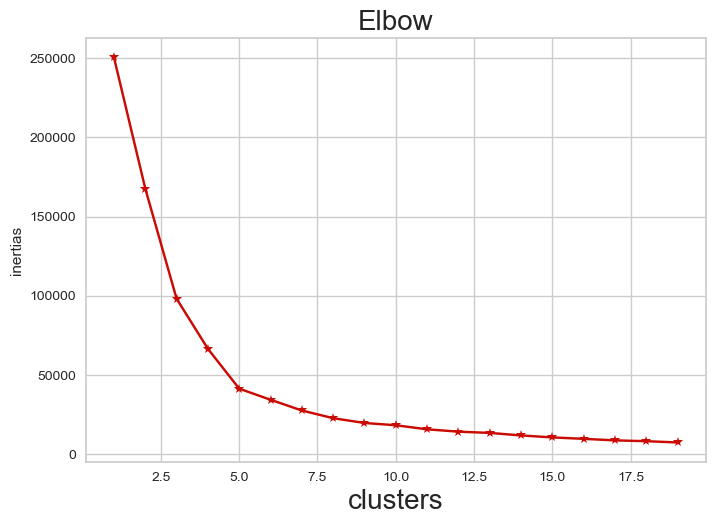

In [23]:
plt.plot(range(1,n),wcss,marker='*',c='r')
plt.title('Elbow',fontsize=20)
plt.xlabel('clusters',fontsize=20)
plt.ylabel('inertias')
plt.show()

another way

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


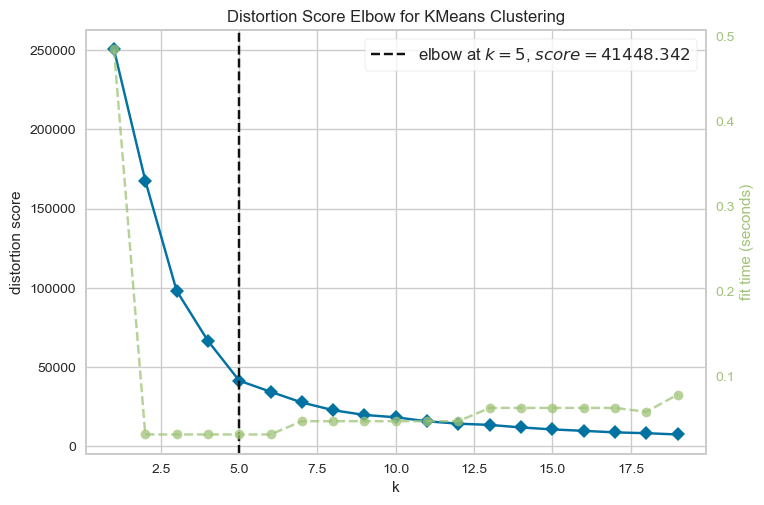

In [24]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [25]:
#Number Of Cluster 5
KMeansModel = KMeans(n_clusters=5,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[88.1875     16.34375   ]
 [87.13513514 82.08108108]
 [26.18181818 20.45454545]
 [25.52941176 81.05882353]
 [55.69444444 49.48611111]]
KMeansModel labels are :  [1 4 4 3 2 2 1 0 4 0 4 0 4 4 4 4 0 1 4 4 0 4 4 4 4 1 1 4 3 0 2 2 3 4 0 4 4
 4 1 2 4 4 3 2 1 1 0 0 0 4 0 1 4 0 1 1 4 4 3 3 1 3 4 1 2 1 0 4 4 0 1 3 0 3
 4 0 4 3 1 4 2 4 0 0 4 4 2 1 1 2 4 4 4 1 3 4 2 2 4 0 4 3 2 2 1 1 4 1 4 4 2
 0 0 1 3 4 4 0 1 2 4 1 4 0 0 3 4 4 1 1 2 2 2 4 4 4 0 0 4 1 3 4 2 4 0 4 0 4
 4 1 1 4 0 3 1 4 0 4 4 0 4 1 2 3 4 4 4 4 0 4 1 4 1 4 4 1 4 1 1 2]
KMeansModel intertia is :  41448.34246328548
KMeansModel No. of iteration is :  4


In [26]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([1, 4, 1, 2, 3, 4, 4, 3, 4, 0, 0, 4, 0, 4, 3, 4, 3, 3, 4, 4])

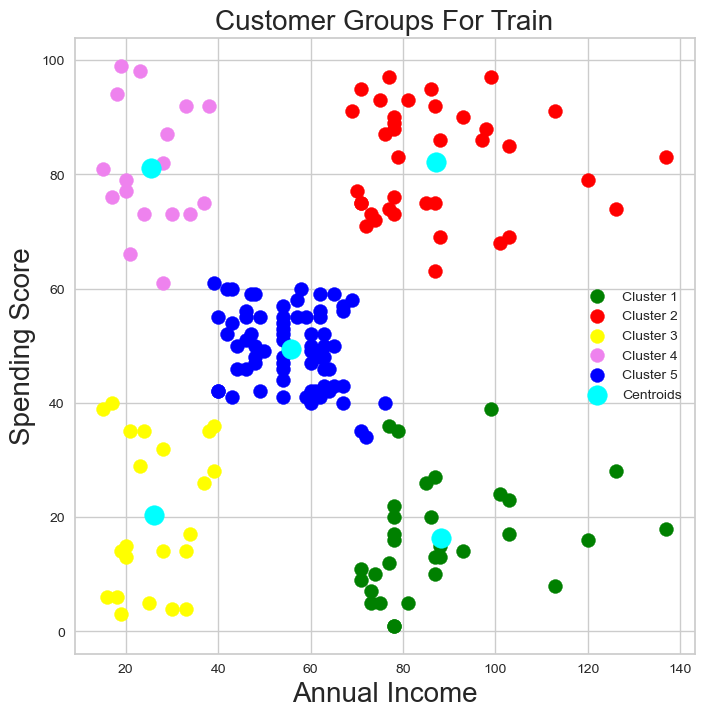

In [27]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='violet', label='Cluster 4')
plt.scatter(X_train.iloc[y==4,0], X_train.iloc[y==4,1], s=100, c='blue', label='Cluster 5')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()

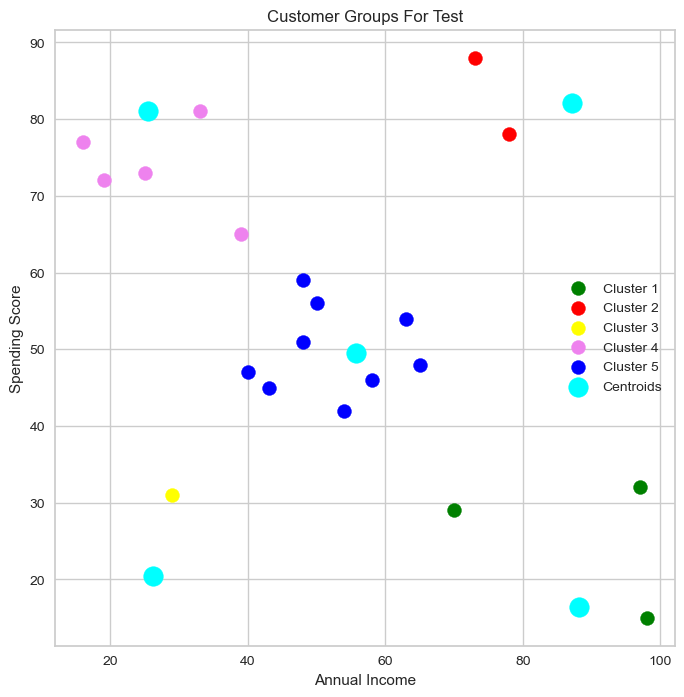

In [28]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='violet', label='Cluster 4')
plt.scatter(X_test.iloc[y_pred==4,0], X_test.iloc[y_pred==4,1], s=100, c='blue', label='Cluster 5')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

AgglomerativeClustering

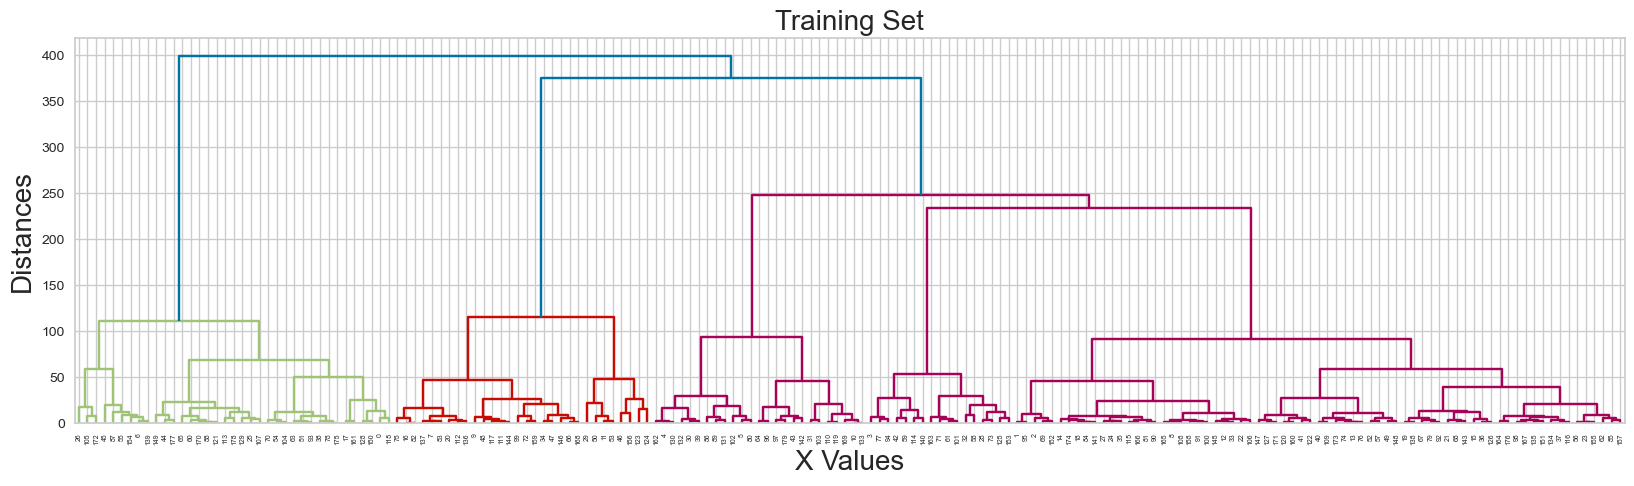

In [29]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

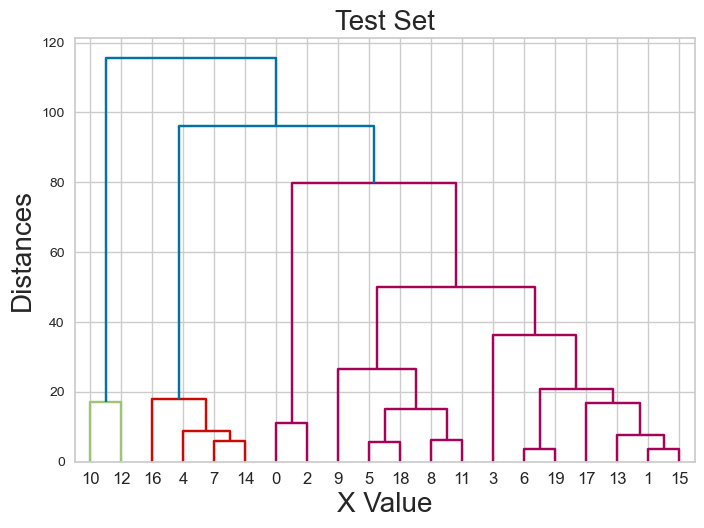

In [30]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [31]:
#number of cluster 5
AggClusteringModel = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [32]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([1, 2, 2, 4, 3, 3, 1, 0, 2, 0, 3, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2,
        2, 2, 2, 1, 1, 2, 4, 0, 3, 3, 4, 2, 0, 2, 2, 2, 1, 3, 2, 2, 4, 3,
        1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 4, 4, 1, 4, 2, 1, 3, 1,
        0, 2, 2, 2, 1, 4, 0, 4, 2, 0, 2, 4, 1, 2, 3, 2, 0, 0, 2, 2, 3, 1,
        1, 3, 2, 2, 2, 1, 4, 2, 3, 3, 2, 0, 2, 4, 3, 3, 1, 1, 2, 1, 2, 2,
        3, 0, 0, 1, 4, 2, 2, 0, 1, 3, 2, 1, 2, 0, 0, 4, 2, 2, 1, 1, 3, 3,
        3, 3, 2, 2, 0, 0, 2, 1, 4, 2, 3, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 4,
        1, 2, 0, 2, 2, 0, 2, 1, 3, 4, 2, 2, 2, 2, 0, 3, 1, 2, 1, 2, 2, 1,
        2, 1, 1, 3], dtype=int64),
 'Test',
 array([3, 0, 3, 0, 2, 1, 0, 2, 1, 1, 4, 1, 4, 0, 2, 0, 2, 0, 1, 0],
       dtype=int64))

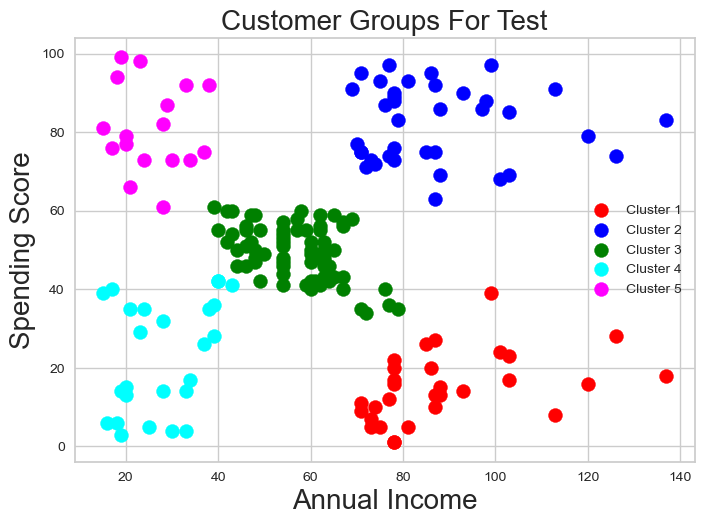

In [33]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_train.iloc[y_pred_train == 4, 0], X_train.iloc[y_pred_train == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

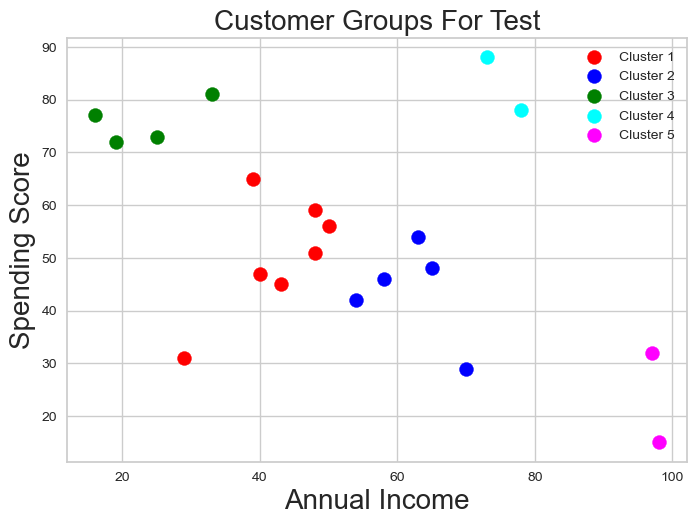

In [34]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_test.iloc[y_pred_test == 4, 0], X_test.iloc[y_pred_test == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

For Feature Age	Spending Score (1-100)

In [35]:
X=data.iloc[:,[2,4]]
X

Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]

In [36]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


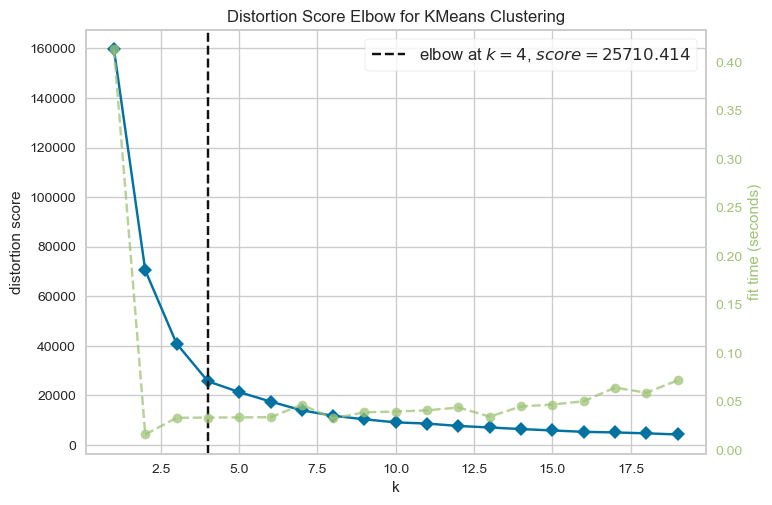

In [37]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [38]:
#Number Of Cluster 4
KMeansModel = KMeans(n_clusters=4,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[43.44444444 14.28888889]
 [30.50980392 82.84313725]
 [55.86046512 48.25581395]
 [28.48780488 48.97560976]]
KMeansModel labels are :  [1 2 3 1 0 0 1 0 3 0 3 0 3 3 3 3 0 1 3 3 0 2 2 2 2 1 1 3 1 3 0 0 3 2 0 2 3
 3 1 0 2 2 1 0 1 1 0 0 0 3 0 1 3 0 1 1 3 2 3 1 1 1 2 1 3 1 0 2 3 2 1 1 0 1
 2 0 3 1 1 2 0 2 0 0 3 2 0 1 1 0 3 3 3 1 1 3 3 3 3 0 3 1 0 0 1 1 3 1 2 3 2
 0 0 1 1 2 2 0 3 2 2 1 2 0 0 1 2 2 1 1 0 0 0 3 2 2 0 0 2 1 1 2 0 2 0 2 0 3
 2 1 1 2 2 1 1 2 0 2 3 0 3 1 0 1 2 3 2 2 0 2 1 3 1 3 2 1 2 1 1 3]
KMeansModel intertia is :  25710.414101038416
KMeansModel No. of iteration is :  5


In [39]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([1, 2, 1, 0, 1, 2, 2, 1, 3, 3, 0, 3, 0, 2, 1, 3, 1, 3, 2, 3])

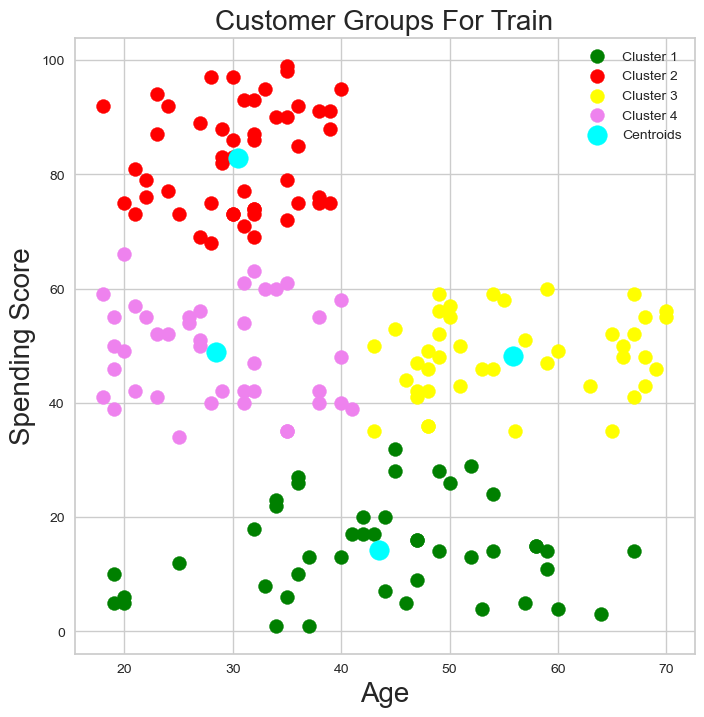

In [40]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()

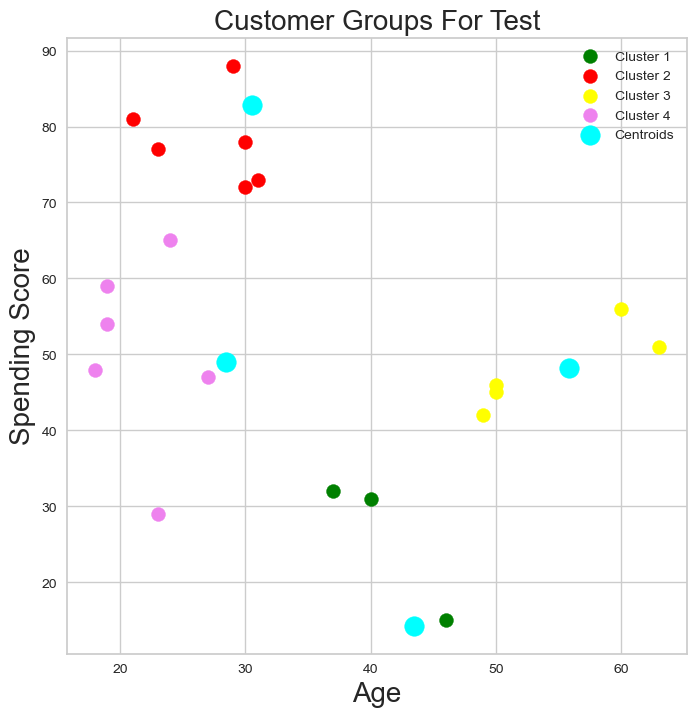

In [41]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()

AgglomerativeClustering

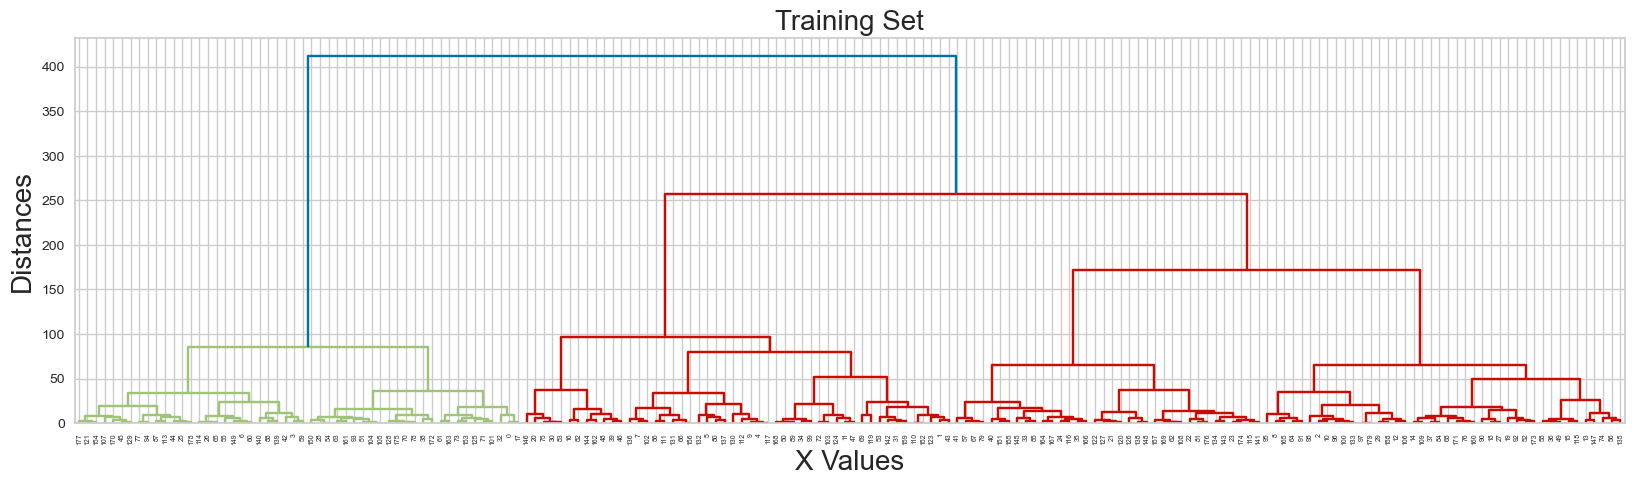

In [42]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

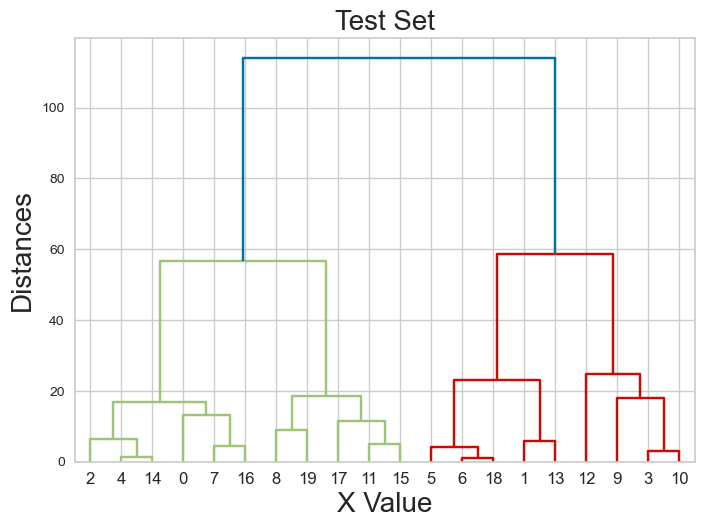

In [43]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [44]:
#number of cluster 4 
AggClusteringModel = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [45]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 3,
        3, 3, 3, 1, 1, 2, 1, 2, 0, 0, 1, 3, 0, 3, 2, 2, 1, 0, 3, 3, 1, 0,
        1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 2, 1,
        0, 3, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 3, 0, 3, 0, 0, 2, 3, 0, 1,
        1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 3, 2,
        0, 0, 0, 1, 1, 3, 3, 0, 2, 0, 3, 1, 3, 0, 0, 1, 3, 3, 1, 1, 0, 0,
        0, 2, 3, 2, 0, 0, 3, 1, 1, 3, 0, 3, 0, 3, 0, 2, 3, 1, 1, 3, 0, 1,
        1, 3, 0, 3, 2, 0, 2, 1, 0, 1, 3, 2, 3, 3, 0, 3, 1, 2, 1, 2, 3, 1,
        3, 1, 1, 2], dtype=int64),
 'Test',
 array([3, 2, 3, 0, 3, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 1, 3, 1, 2, 1],
       dtype=int64))

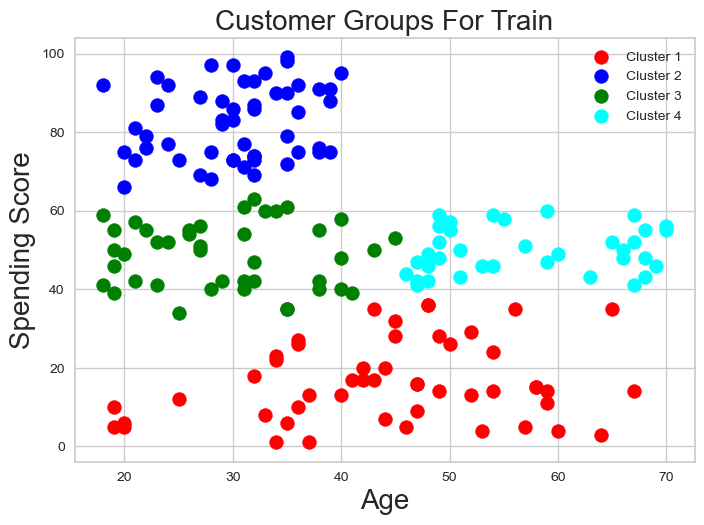

In [46]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

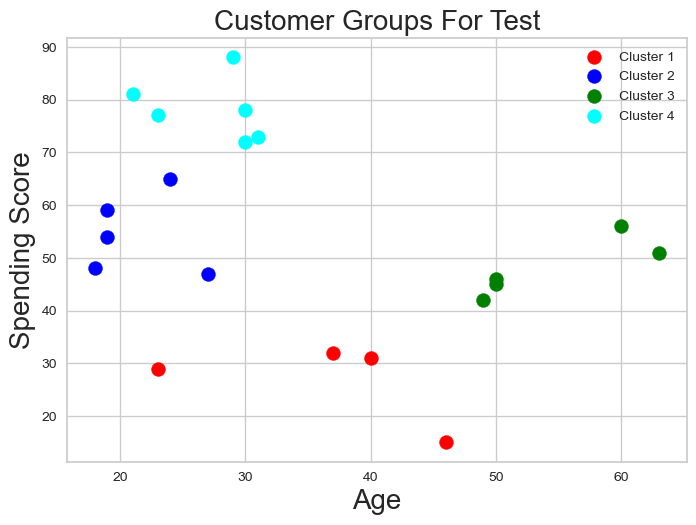

In [47]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

For Feature Age	Annual Income (k$)

In [48]:
X=data.iloc[:,[2,3]]
X

Age  Annual Income (k$)
0     19                  15
1     21                  15
2     20                  16
3     23                  16
4     31                  17
..   ...                 ...
195   35                 120
196   45                 126
197   32                 126
198   32                 137
199   30                 137

[200 rows x 2 columns]

In [49]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


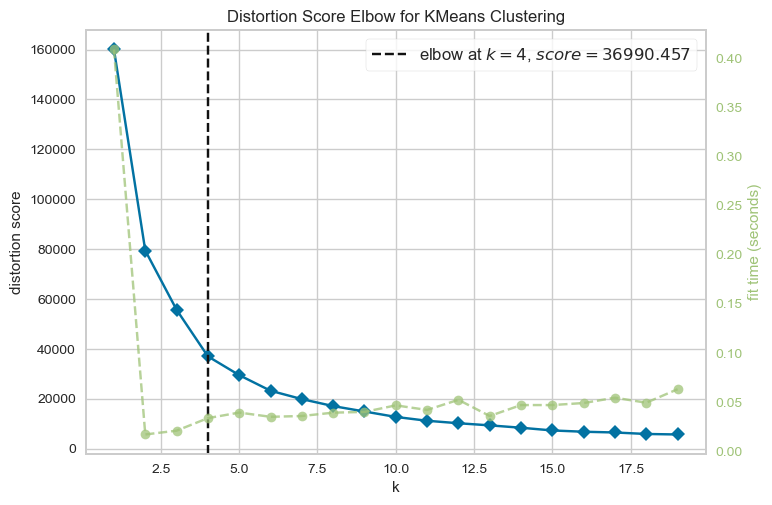

In [50]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [51]:
#Number Of Cluster 4
KMeansModel = KMeans(n_clusters=4,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[ 33.09090909  28.54545455]
 [ 55.60869565  53.73913043]
 [ 37.15       109.25      ]
 [ 33.2         73.61428571]]
KMeansModel labels are :  [3 3 3 0 0 0 2 3 3 2 0 2 3 1 3 0 3 2 3 0 3 1 1 1 1 3 2 3 0 2 0 1 0 1 3 1 0
 0 3 0 1 1 0 0 3 2 2 3 3 3 2 3 3 2 3 2 1 1 0 0 3 0 1 3 0 3 3 1 0 3 3 0 3 0
 1 3 3 0 3 1 1 1 3 3 3 1 0 2 3 0 3 3 0 3 0 3 0 0 0 3 3 0 0 0 3 2 3 3 1 3 1
 3 1 3 0 1 1 3 3 1 1 3 1 2 2 0 1 1 3 3 0 0 0 0 1 1 3 1 1 2 0 1 0 1 3 1 3 3
 1 3 3 1 3 0 2 1 2 1 3 3 3 2 0 0 1 3 1 1 3 1 3 3 2 3 1 3 1 3 3 0]
KMeansModel intertia is :  36990.45725578768
KMeansModel No. of iteration is :  7


In [52]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([3, 1, 3, 0, 0, 1, 1, 0, 3, 3, 2, 3, 2, 1, 0, 0, 0, 0, 1, 0])

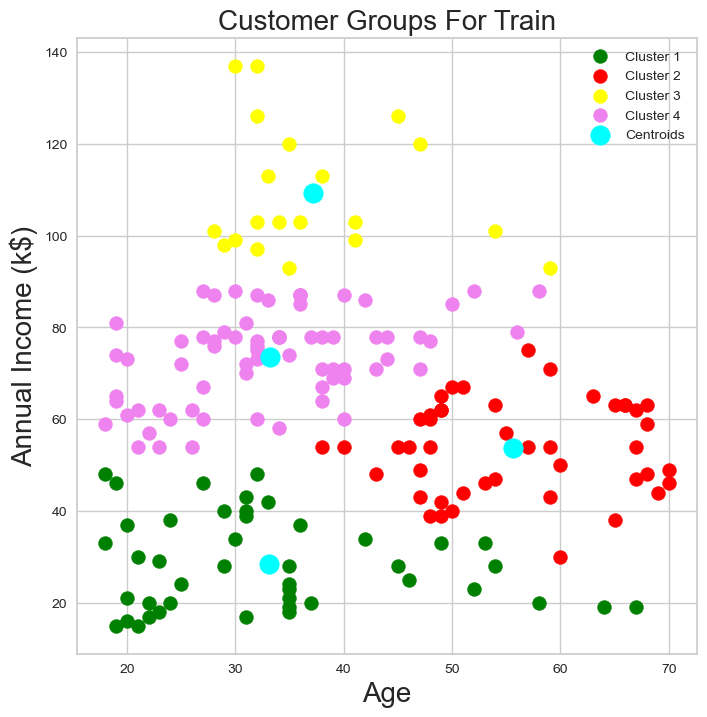

In [53]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()

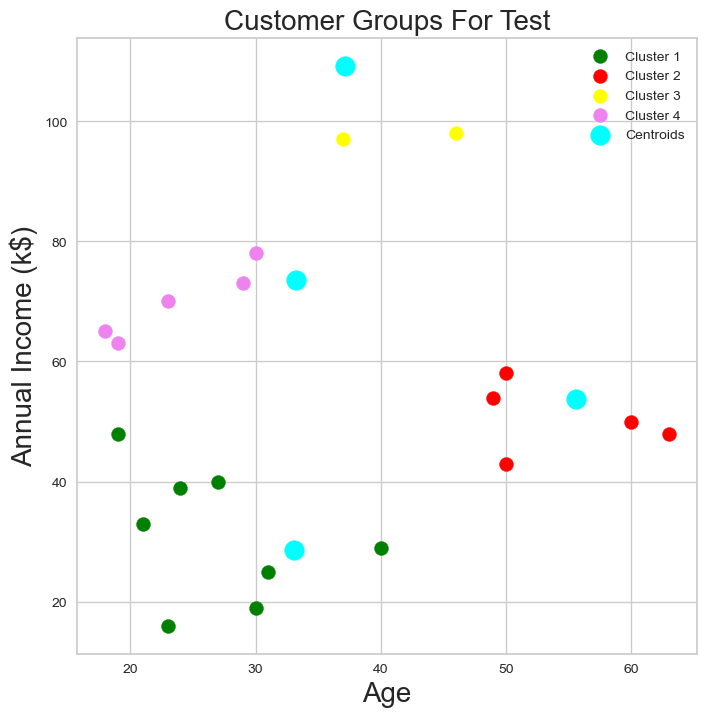

In [54]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()

AggClusteringModel

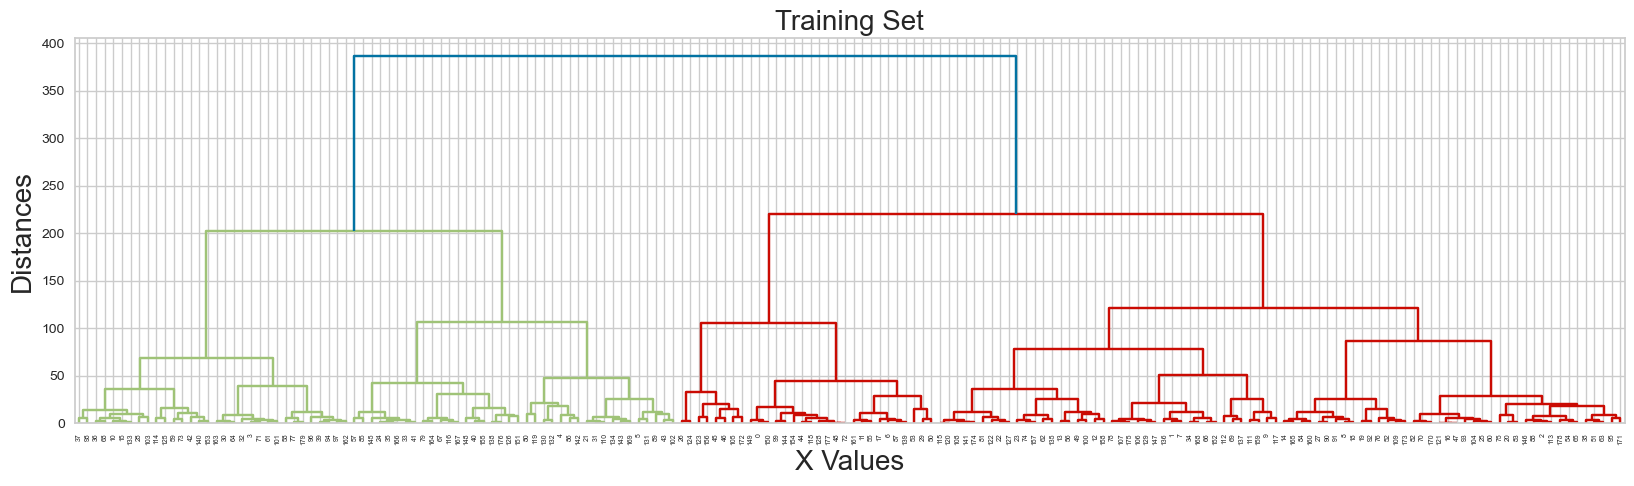

In [55]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

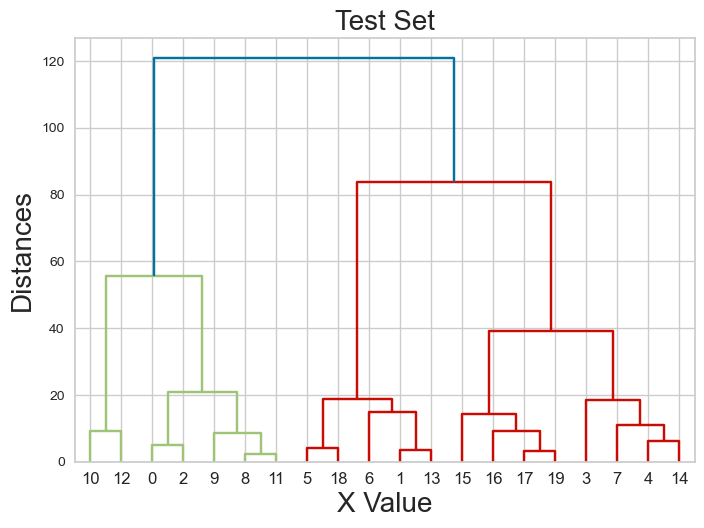

In [56]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [57]:
#number of cluster 4 
AggClusteringModel = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [58]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([2, 0, 0, 3, 1, 1, 2, 0, 0, 0, 3, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1,
        0, 0, 1, 0, 2, 0, 3, 2, 3, 1, 3, 1, 0, 1, 3, 3, 0, 3, 1, 1, 3, 1,
        2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 3, 3, 0, 3, 0, 0, 3, 0,
        0, 1, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2,
        0, 1, 0, 0, 0, 0, 3, 0, 3, 3, 3, 2, 0, 3, 1, 3, 0, 2, 0, 0, 0, 0,
        1, 0, 0, 0, 3, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 3, 1, 0, 2, 0, 1, 1,
        1, 3, 1, 0, 0, 0, 1, 2, 3, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 3,
        2, 1, 2, 0, 0, 0, 0, 2, 3, 3, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0,
        1, 2, 0, 3], dtype=int64),
 'Test',
 array([1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 3, 1, 3, 2, 0, 0, 0, 0, 2, 0],
       dtype=int64))

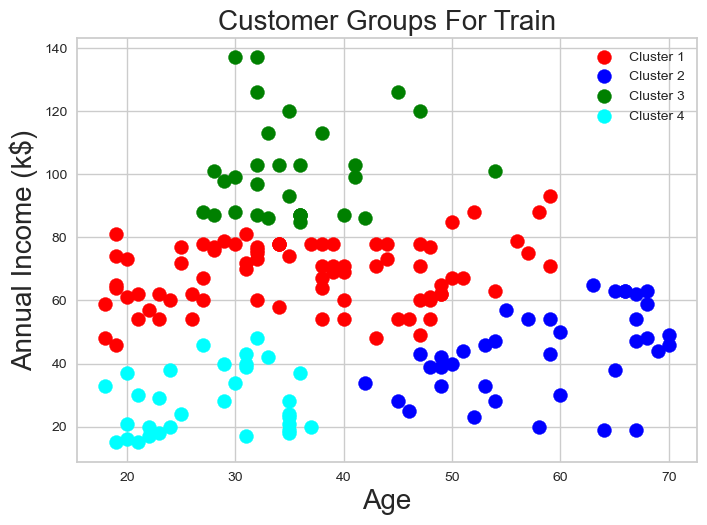

In [59]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()
plt.show()

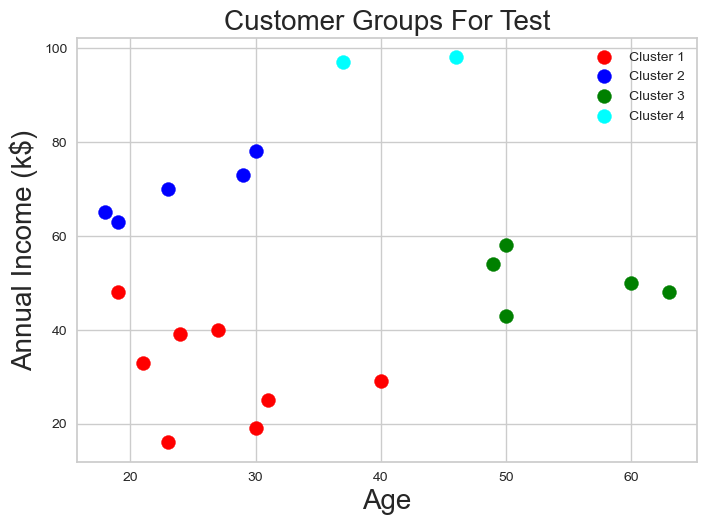

In [60]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()
plt.show()

For Feature Gender	Spending Score (1-100)

In [61]:
X=data.iloc[:,[1,4]]
X.Gender[X.Gender=='Male']=1
X.Gender[X.Gender=='Female']=0
X

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14380\541711259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Gender[X.Gender=='Male']=1
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14380\541711259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Gender[X.Gender=='Female']=0


Gender  Spending Score (1-100)
0        1                      39
1        1                      81
2        0                       6
3        0                      77
4        0                      40
..     ...                     ...
195      0                      79
196      0                      28
197      1                      74
198      1                      18
199      1                      83

[200 rows x 2 columns]

In [62]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


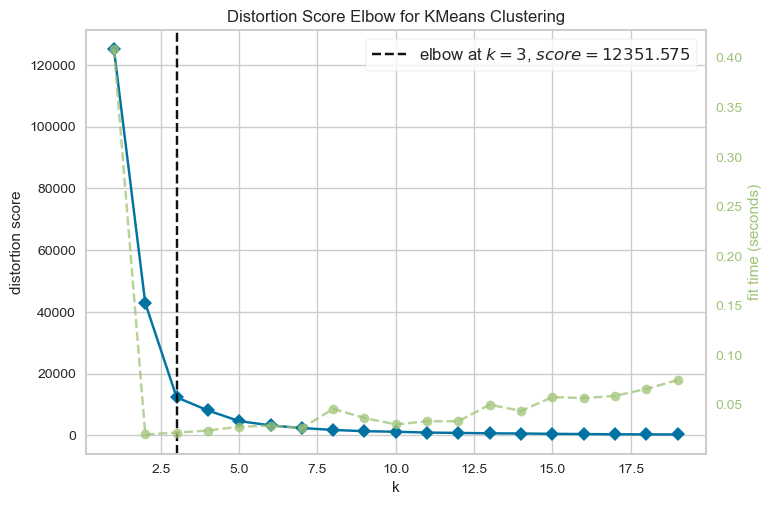

In [63]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [64]:
#Number Of Cluster 3
KMeansModel = KMeans(n_clusters=3,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[ 0.52272727 13.88636364]
 [ 0.46153846 82.51923077]
 [ 0.44047619 48.20238095]]
KMeansModel labels are :  [1 2 2 1 0 0 1 0 2 0 2 0 2 2 2 2 0 1 2 2 0 2 2 2 2 1 1 2 1 2 0 0 1 2 0 2 2
 2 1 0 2 2 1 2 1 1 0 0 0 2 0 1 2 0 1 1 2 2 2 1 1 1 2 1 2 1 0 2 2 2 1 1 0 1
 2 0 2 1 1 2 0 2 0 0 2 2 0 1 1 0 2 2 2 1 1 2 2 2 2 0 2 1 0 0 1 1 2 1 2 2 2
 0 0 1 1 2 2 0 2 2 2 1 2 0 0 1 2 2 1 1 0 0 0 2 2 2 0 0 2 1 1 2 0 2 0 2 0 2
 2 1 1 2 2 1 1 2 0 2 2 0 2 1 0 1 2 2 2 2 0 2 1 2 1 2 2 1 2 1 1 2]
KMeansModel intertia is :  12351.574841824844
KMeansModel No. of iteration is :  3


In [65]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2])

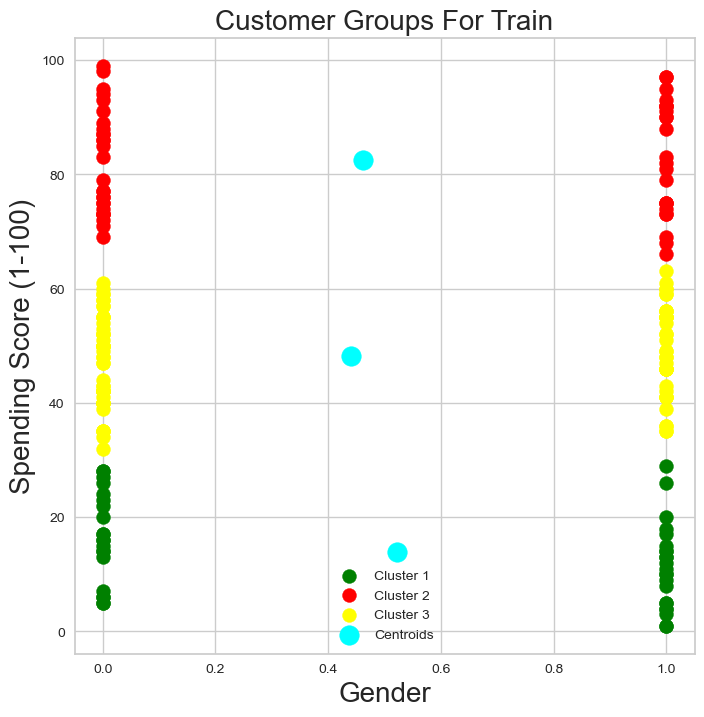

In [66]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()

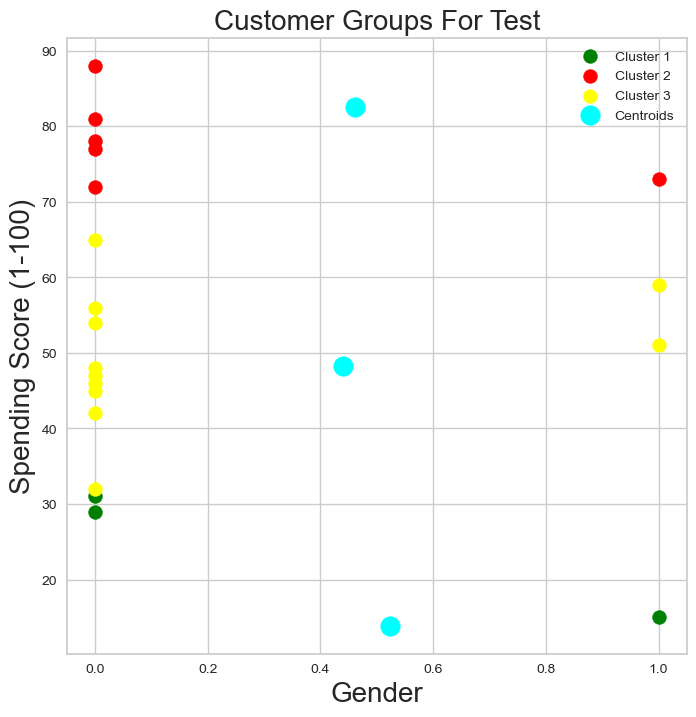

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()

AggClusteringModel

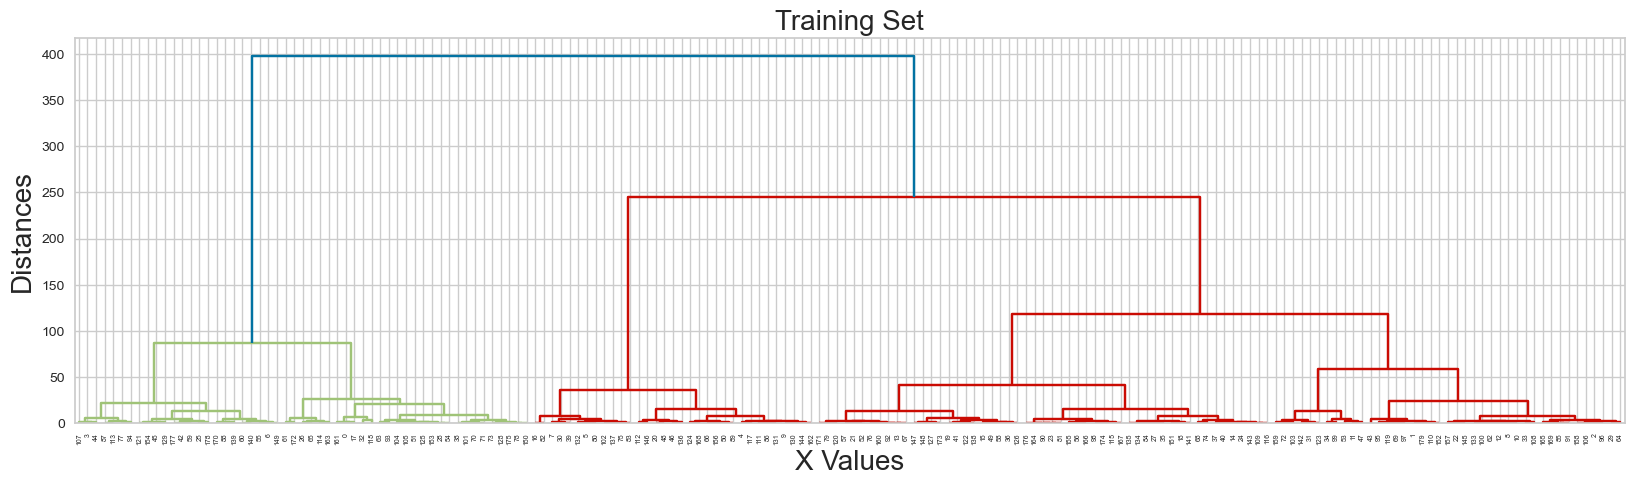

In [68]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

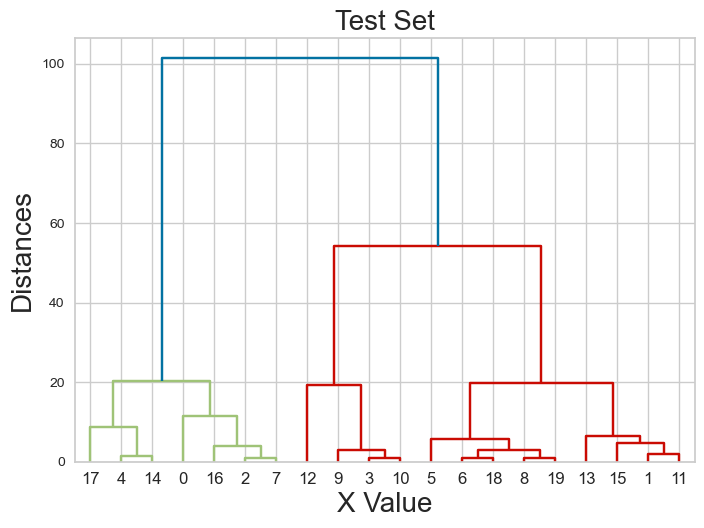

In [69]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [70]:
#number of cluster 3
AggClusteringModel = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [71]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0,
        1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1,
        1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0,
        0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2,
        2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 0], dtype=int64),
 'Test',
 array([0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1],
       dtype=int64))

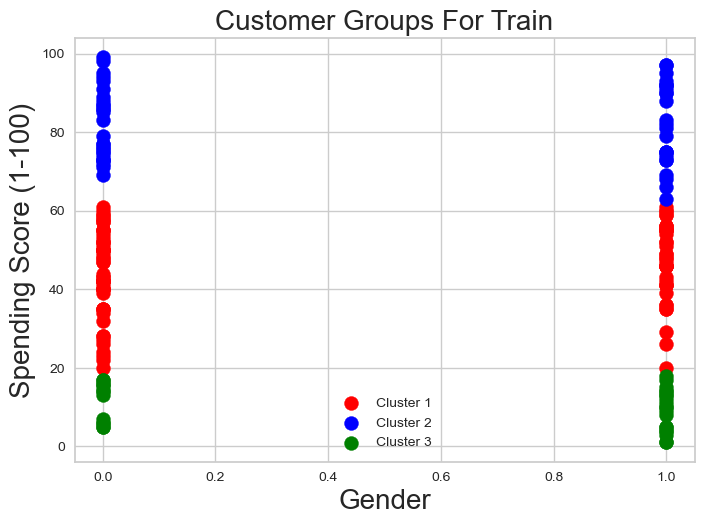

In [72]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

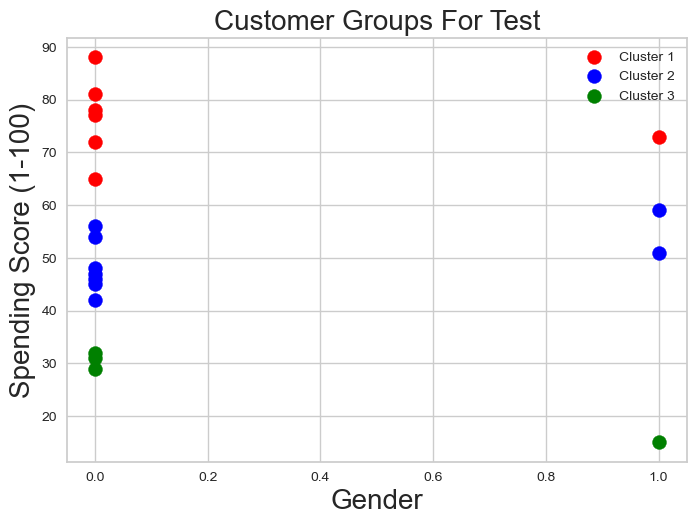

In [73]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

For Feature Gender	Age

In [74]:
X=data.iloc[:,[1,2]]
X.Gender[X.Gender=='Male']=1
X.Gender[X.Gender=='Female']=0
X

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14380\1310074741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Gender[X.Gender=='Male']=1
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14380\1310074741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Gender[X.Gender=='Female']=0


Gender  Age
0        1   19
1        1   21
2        0   20
3        0   23
4        0   31
..     ...  ...
195      0   35
196      0   45
197      1   32
198      1   32
199      1   30

[200 rows x 2 columns]

In [75]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


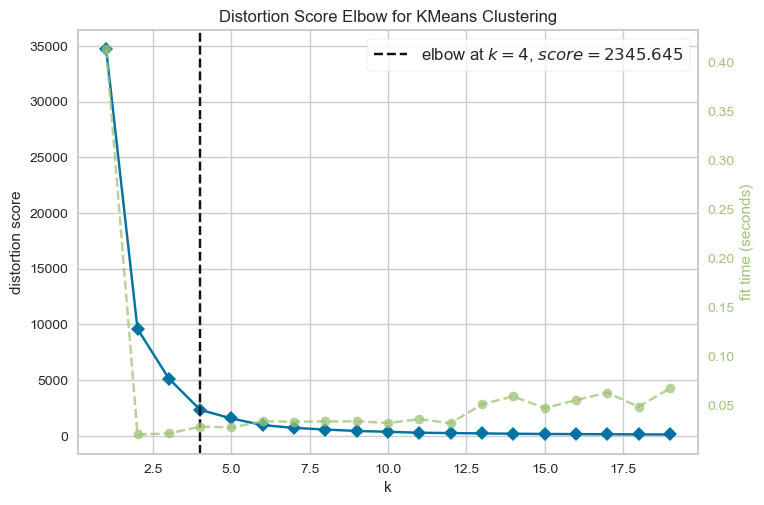

In [76]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [77]:
#Number Of Cluster 4
KMeansModel = KMeans(n_clusters=4,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[ 0.57142857 22.76190476]
 [ 0.62962963 63.40740741]
 [ 0.39705882 34.35294118]
 [ 0.37209302 48.30232558]]
KMeansModel labels are :  [0 3 0 0 1 3 2 3 0 1 2 2 2 2 0 2 2 0 0 0 0 3 3 3 1 2 2 0 2 2 0 3 0 1 3 1 2
 0 2 2 1 1 0 3 2 2 2 2 2 2 2 2 0 3 2 2 2 1 2 0 2 0 3 2 0 2 3 1 2 1 2 0 2 0
 3 0 0 2 2 1 1 3 2 0 0 1 3 2 0 3 0 0 0 2 2 0 2 2 2 3 2 0 3 2 2 2 2 2 3 0 3
 3 1 0 2 3 1 1 2 1 3 2 3 3 2 0 1 3 2 2 1 3 1 2 3 3 3 1 3 2 0 3 3 3 2 1 0 2
 3 2 0 1 3 0 2 1 3 3 2 3 0 2 2 0 1 0 1 1 3 3 2 0 2 0 3 2 3 2 2 2]
KMeansModel intertia is :  2345.6446793187556
KMeansModel No. of iteration is :  5


In [78]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([2, 1, 2, 2, 2, 3, 3, 0, 0, 0, 2, 0, 3, 1, 2, 0, 0, 0, 3, 0])

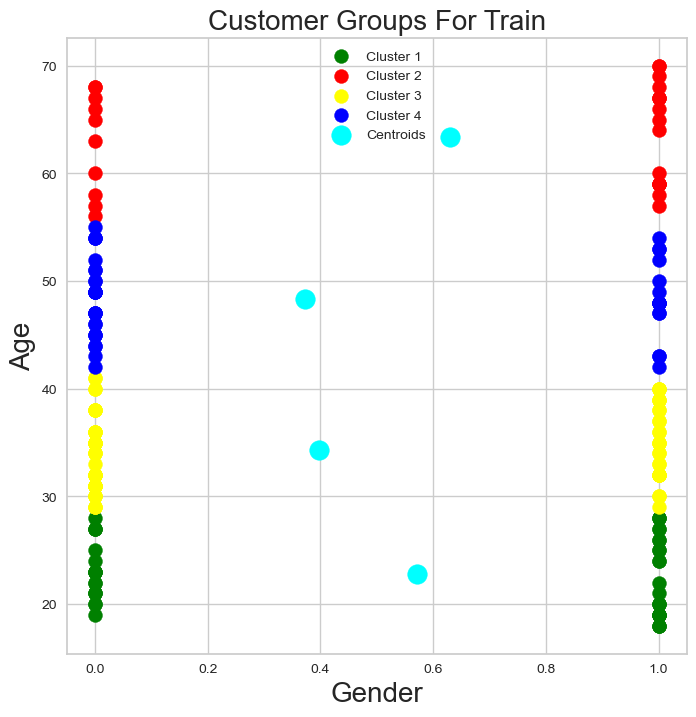

In [79]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='blue', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.legend()

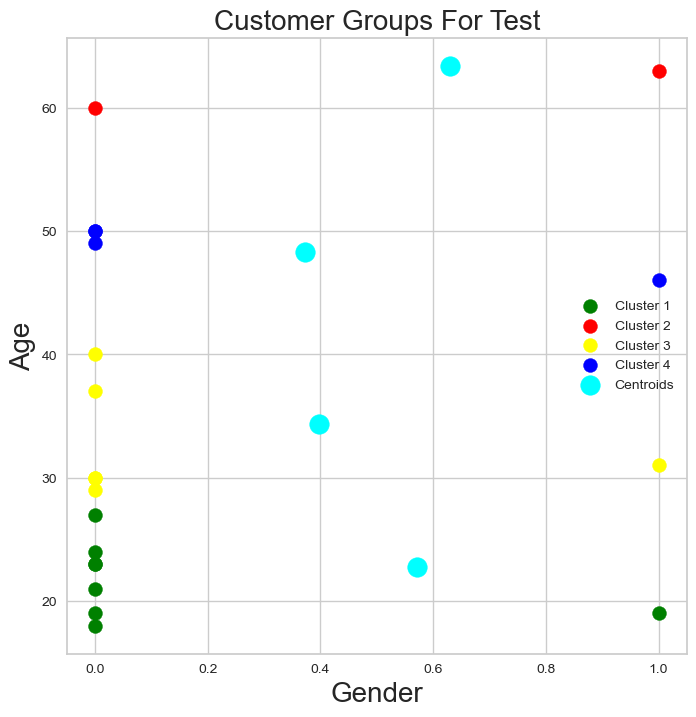

In [80]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='blue', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.legend()

AgglomerativeClustering

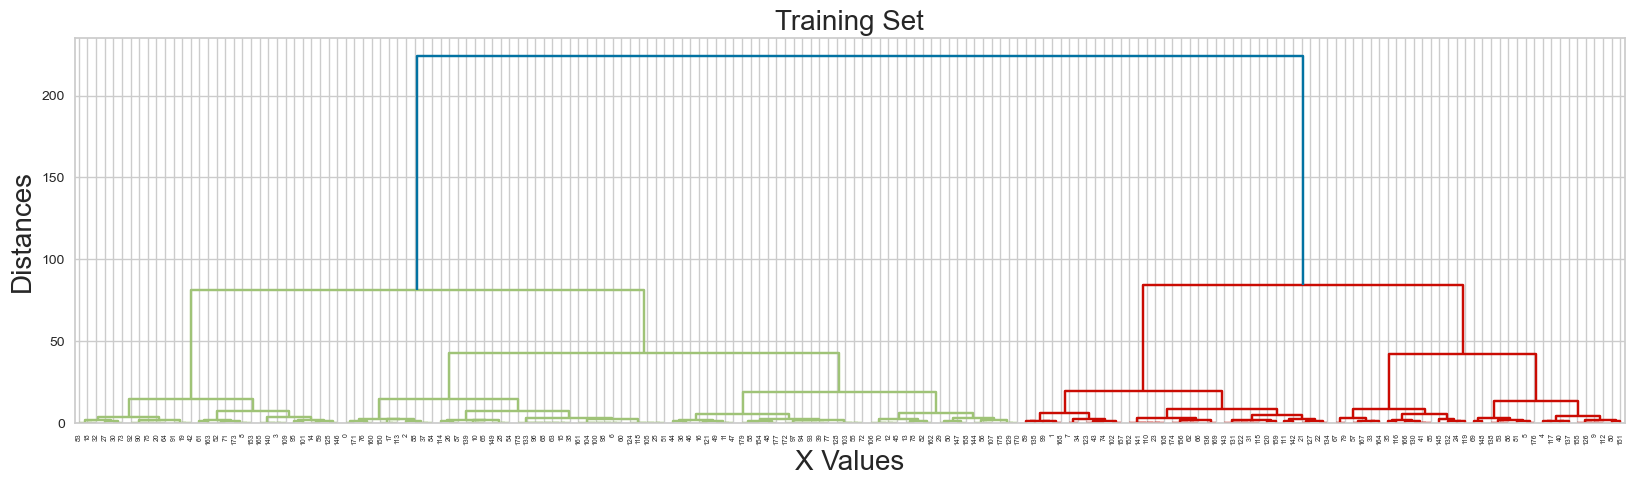

In [81]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

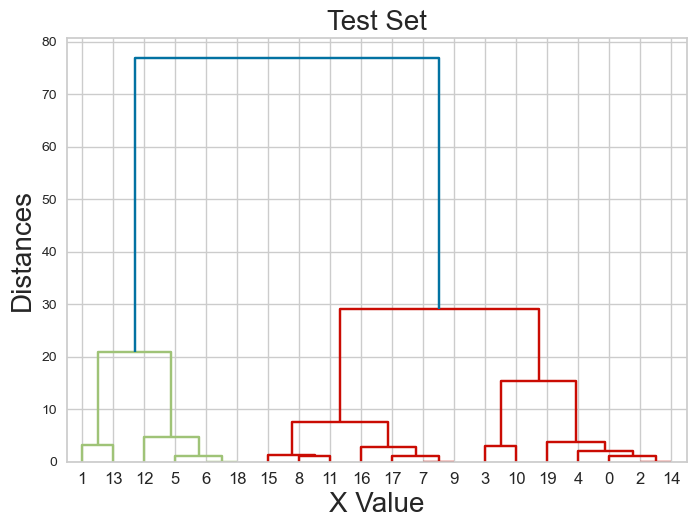

In [82]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [83]:
#number of cluster 4
AggClusteringModel = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [84]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([0, 2, 0, 3, 1, 1, 0, 2, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 2,
        2, 2, 1, 0, 0, 3, 0, 0, 3, 2, 3, 1, 2, 1, 0, 0, 0, 0, 1, 1, 3, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 3, 0, 3, 2, 0, 3, 0,
        2, 1, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 0, 1, 1, 1, 0, 3, 0, 1, 1, 0,
        0, 2, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 2, 3,
        2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 3, 1, 2, 0, 0, 1, 2,
        1, 0, 2, 2, 2, 1, 1, 0, 3, 2, 2, 2, 0, 1, 3, 0, 1, 0, 0, 1, 2, 3,
        0, 1, 2, 2, 0, 2, 0, 0, 0, 3, 1, 3, 1, 1, 2, 2, 0, 0, 0, 3, 2, 0,
        1, 0, 0, 0], dtype=int64),
 'Test',
 array([0, 3, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 3, 0, 2, 2, 2, 1, 0],
       dtype=int64))

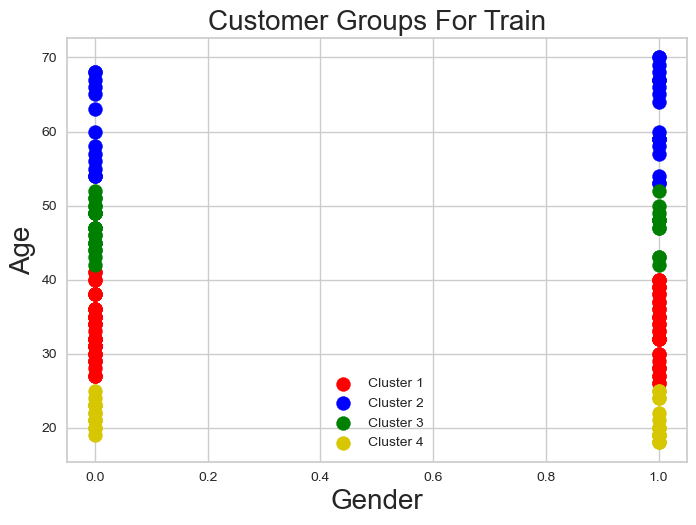

In [85]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.legend()
plt.show()

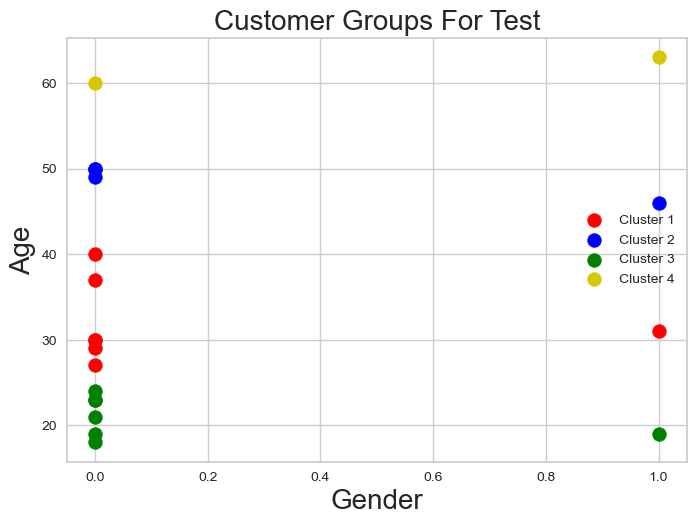

In [86]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.legend()
plt.show()

For Feature Gender	Annual Income (k$)

In [87]:
X=data.iloc[:,[1,3]]
X.Gender[X.Gender=='Male']=1
X.Gender[X.Gender=='Female']=0
X

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14380\2174638945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Gender[X.Gender=='Male']=1
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14380\2174638945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Gender[X.Gender=='Female']=0


Gender  Annual Income (k$)
0        1                  15
1        1                  15
2        0                  16
3        0                  16
4        0                  17
..     ...                 ...
195      0                 120
196      0                 126
197      1                 126
198      1                 137
199      1                 137

[200 rows x 2 columns]

In [88]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


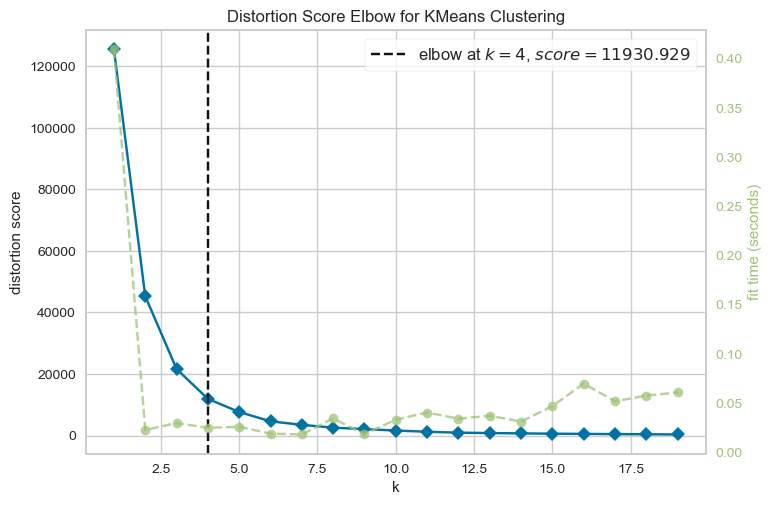

In [89]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [90]:
#Number Of Cluster 4
KMeansModel = KMeans(n_clusters=4,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[  0.39534884  27.18604651]
 [  0.54237288  78.01694915]
 [  0.48333333  54.91666667]
 [  0.33333333 111.05555556]]
KMeansModel labels are :  [1 1 1 0 0 0 3 1 2 1 0 3 2 2 2 0 1 3 2 2 1 0 1 2 2 1 3 2 0 3 0 0 0 2 1 2 2
 2 1 0 2 2 0 0 1 3 3 1 1 2 3 1 2 3 1 3 2 2 0 0 1 0 2 1 0 1 1 2 2 1 1 0 1 0
 2 1 2 0 1 2 0 2 1 1 2 2 0 3 1 0 2 2 2 1 0 1 0 0 2 1 2 0 0 0 1 3 1 1 2 2 0
 1 1 1 0 2 2 1 1 0 2 1 2 3 3 0 2 1 1 1 0 0 0 0 2 2 1 1 2 3 0 2 0 2 1 2 1 1
 2 1 1 2 1 0 1 2 3 2 2 1 2 3 0 0 2 2 2 2 1 2 1 1 3 2 2 1 2 1 1 0]
KMeansModel intertia is :  11930.928927429595
KMeansModel No. of iteration is :  3


In [91]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 3, 2, 3, 2, 0, 2, 0, 0, 2, 0])

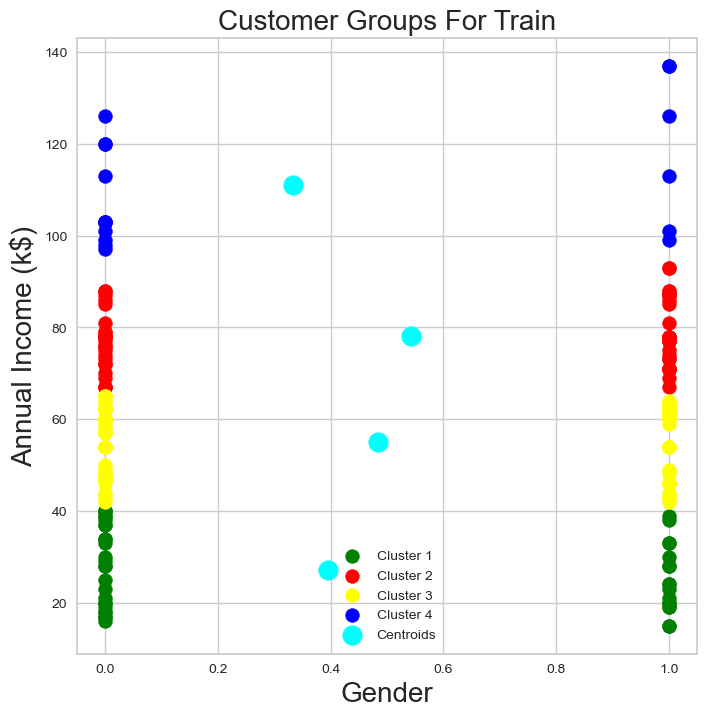

In [92]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='blue', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()

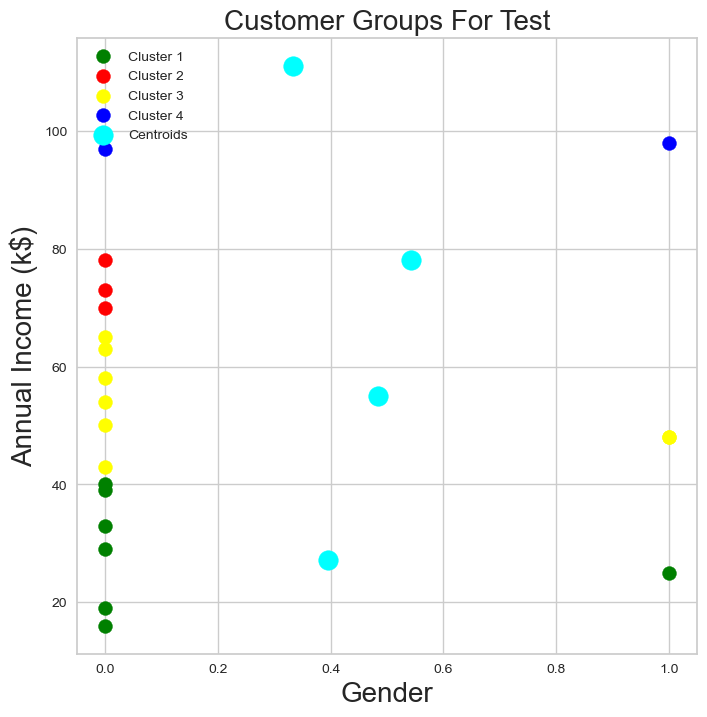

In [93]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='blue', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()

AgglomerativeClustering

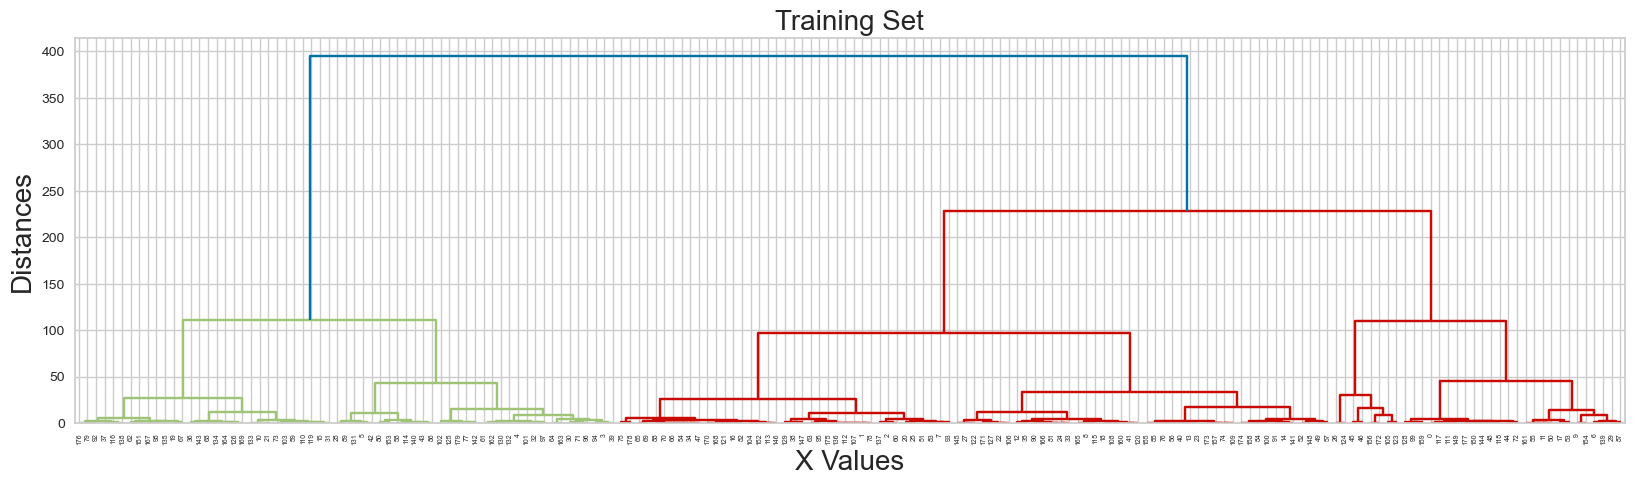

In [94]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

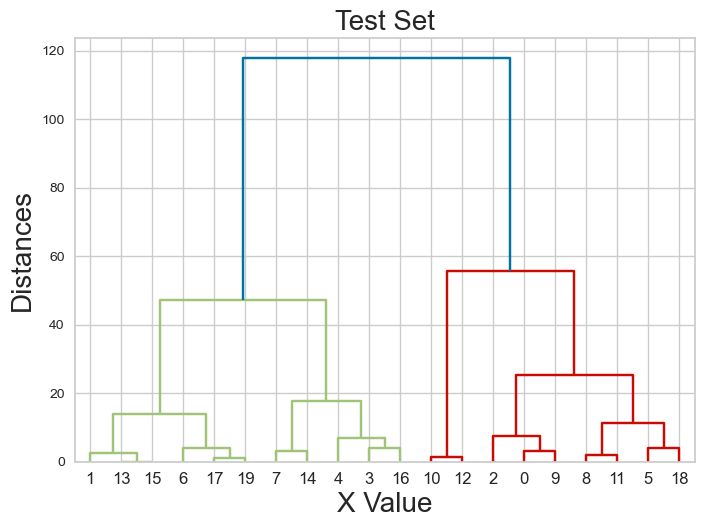

In [95]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [96]:
#number of cluster 4
AggClusteringModel = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [97]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 3, 0, 2, 2, 2, 3, 2, 0, 2, 3, 2, 3,
        2, 2, 2, 2, 0, 2, 1, 0, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 2, 2, 1, 1,
        0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 3, 2, 1, 3, 2, 1, 2,
        2, 3, 3, 2, 2, 1, 0, 3, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 1, 0,
        2, 1, 2, 2, 3, 2, 1, 2, 1, 1, 3, 0, 2, 1, 1, 3, 2, 0, 2, 2, 2, 2,
        3, 0, 2, 2, 1, 2, 3, 0, 0, 3, 2, 2, 2, 0, 0, 1, 3, 2, 0, 2, 1, 1,
        1, 3, 3, 3, 2, 2, 3, 0, 1, 2, 1, 3, 0, 2, 2, 2, 2, 0, 0, 3, 2, 1,
        0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 3, 2, 2, 3, 2, 3, 2, 2, 0, 2, 2, 2,
        3, 0, 2, 1], dtype=int64),
 'Test',
 array([0, 3, 0, 1, 1, 0, 3, 1, 0, 0, 2, 0, 2, 3, 1, 3, 1, 3, 0, 3],
       dtype=int64))

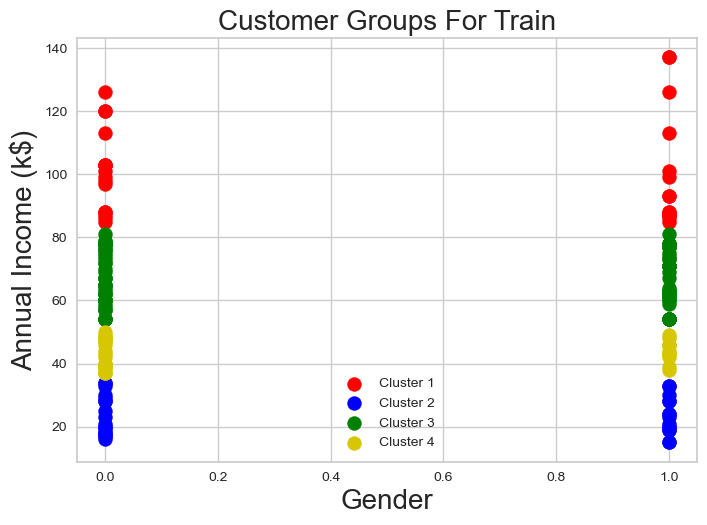

In [98]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()
plt.show()

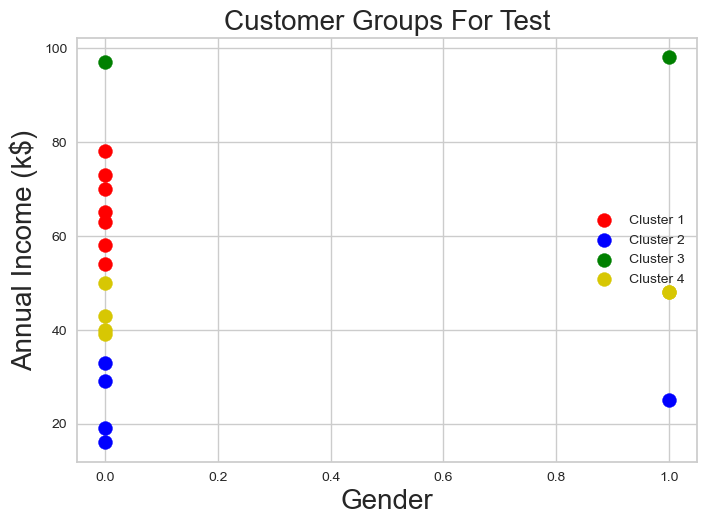

In [99]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()
plt.show()

For all Feature

In [100]:
X=data.iloc[:,1:]
X.Gender[X.Gender=='Male']=1
X.Gender[X.Gender=='Female']=0
X

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14380\317940618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Gender[X.Gender=='Male']=1
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_14380\317940618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Gender[X.Gender=='Female']=0


Gender  Age  Annual Income (k$)  Spending Score (1-100)
0        1   19                  15                      39
1        1   21                  15                      81
2        0   20                  16                       6
3        0   23                  16                      77
4        0   31                  17                      40
..     ...  ...                 ...                     ...
195      0   35                 120                      79
196      0   45                 126                      28
197      1   32                 126                      74
198      1   32                 137                      18
199      1   30                 137                      83

[200 rows x 4 columns]

In [101]:
PCAModel = PCA(n_components=2, svd_solver='auto')
X=PCAModel.fit_transform(X)
X=pd.DataFrame(X,columns=['Feature1','Feature2'])
X

Feature1   Feature2
0   -31.869945 -33.001252
1     0.764494 -56.842901
2   -57.408276 -13.124961
3    -2.168543 -53.478590
4   -32.174085 -30.388412
..         ...        ...
195  58.352515  31.017542
196  19.908001  66.446108
197  58.520804  38.346039
198  20.979130  79.376405
199  72.447693  41.811336

[200 rows x 2 columns]

In [102]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


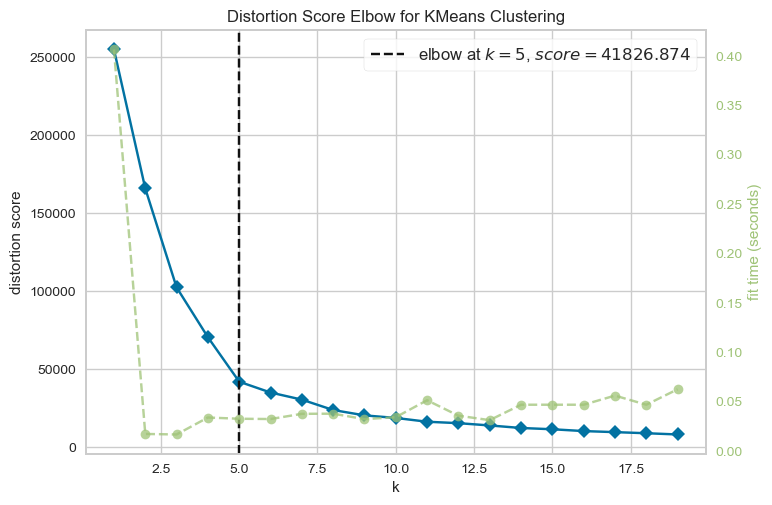

In [103]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [104]:
#Number Of Cluster 5
KMeansModel = KMeans(n_clusters=5,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[-10.87951271  42.13136939]
 [ 41.83259678   2.40290132]
 [-44.86408483  -9.85527403]
 [ -4.23297485  -2.96371618]
 [  6.23061563 -47.82638873]]
KMeansModel labels are :  [1 3 3 4 2 2 1 0 3 0 3 0 3 3 3 3 0 1 3 3 0 3 3 3 3 1 1 3 4 0 2 2 4 3 0 3 3
 3 1 2 3 3 4 2 1 1 0 0 0 3 0 1 3 0 1 1 3 3 4 4 1 4 3 1 2 1 0 3 3 0 1 4 0 4
 3 0 3 4 1 3 2 3 0 0 3 3 2 1 1 2 3 3 3 1 4 3 2 2 3 0 3 4 2 2 1 1 3 1 3 3 2
 0 0 1 4 3 3 0 1 2 3 1 3 0 0 4 3 3 1 1 2 2 2 3 3 3 0 0 3 1 4 3 2 3 0 3 0 3
 3 1 1 3 0 4 1 3 0 3 3 0 3 1 2 4 3 3 3 3 0 3 1 3 1 3 3 1 3 1 1 2]
KMeansModel intertia is :  41826.873925157946
KMeansModel No. of iteration is :  4


In [105]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([1, 3, 1, 2, 4, 3, 3, 4, 3, 3, 0, 3, 0, 3, 4, 3, 4, 4, 3, 3])

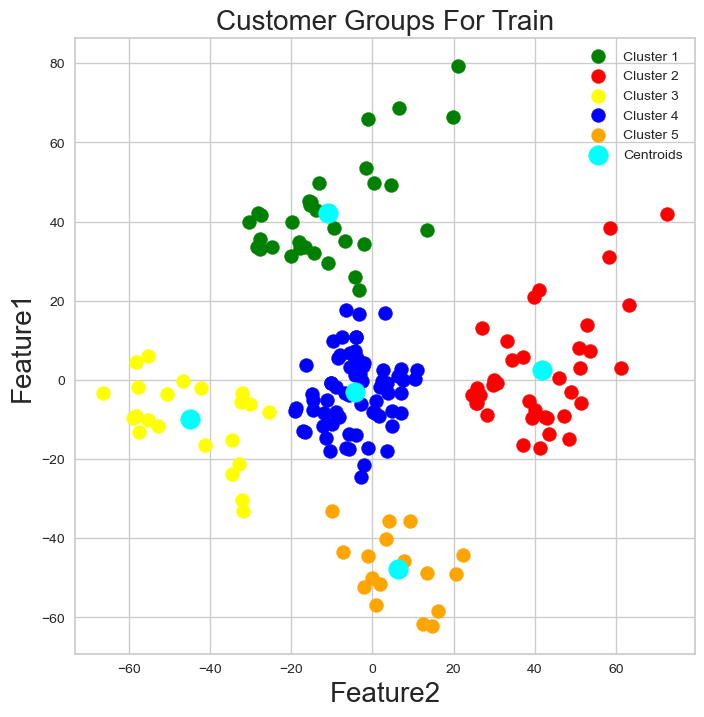

In [106]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='blue', label='Cluster 4')
plt.scatter(X_train.iloc[y==4,0], X_train.iloc[y==4,1], s=100, c='orange', label='Cluster 5')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Feature2',fontsize=20)
plt.ylabel('Feature1',fontsize=20)
plt.legend()

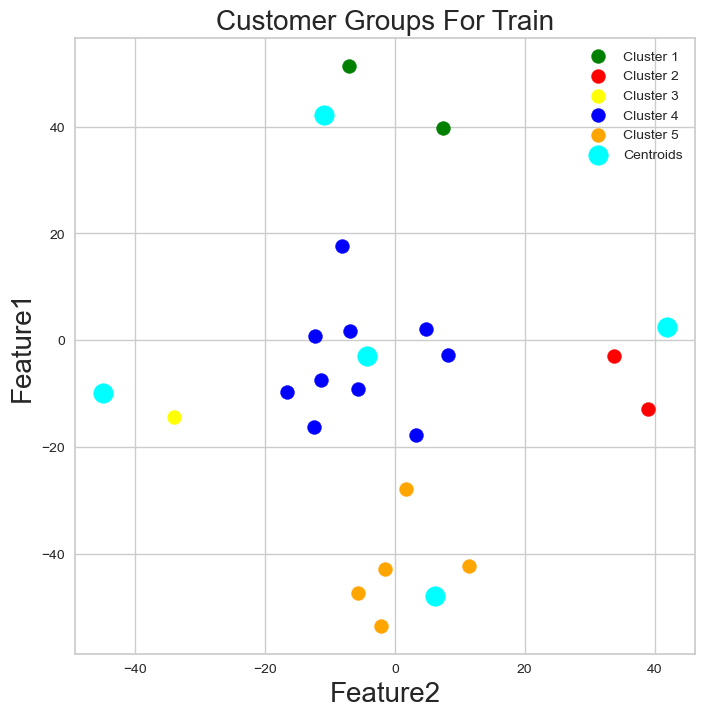

In [107]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='blue', label='Cluster 4')
plt.scatter(X_test.iloc[y_pred==4,0], X_test.iloc[y_pred==4,1], s=100, c='orange', label='Cluster 5')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Feature2',fontsize=20)
plt.ylabel('Feature1',fontsize=20)
plt.legend()

AgglomerativeClustering

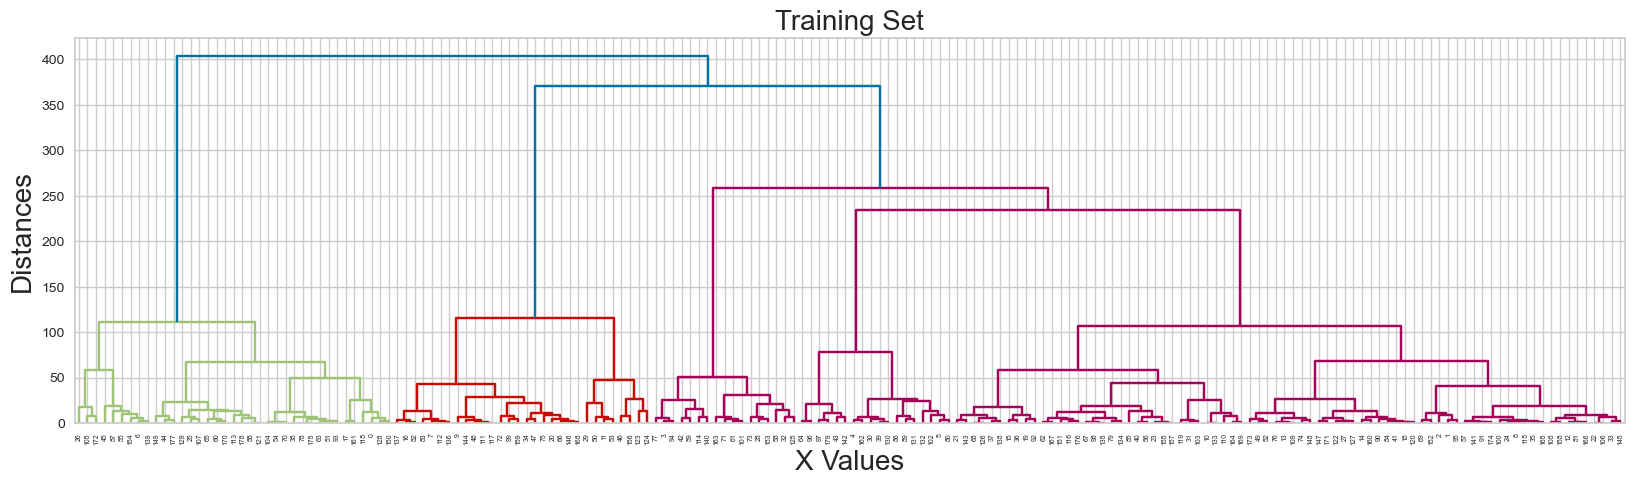

In [108]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

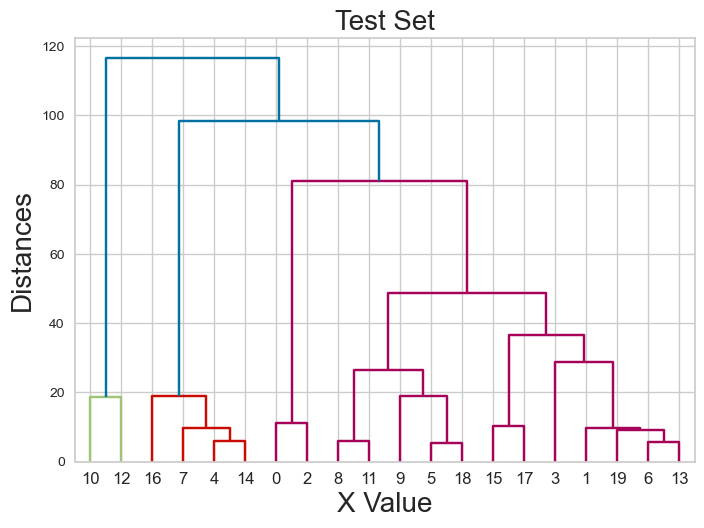

In [109]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [110]:
#number of cluster 5
AggClusteringModel = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [111]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([1, 2, 2, 3, 4, 4, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2,
        2, 2, 2, 1, 1, 2, 3, 0, 4, 2, 3, 2, 0, 2, 2, 2, 1, 4, 2, 2, 3, 4,
        1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 3, 3, 1, 3, 2, 1, 4, 1,
        0, 2, 2, 2, 1, 3, 0, 3, 2, 0, 2, 3, 1, 2, 4, 2, 0, 0, 2, 2, 4, 1,
        1, 4, 2, 2, 2, 1, 3, 2, 4, 4, 2, 0, 2, 3, 4, 2, 1, 1, 2, 1, 2, 2,
        2, 0, 0, 1, 3, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 3, 2, 2, 1, 1, 4, 4,
        4, 2, 2, 2, 0, 0, 2, 1, 3, 2, 4, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 3,
        1, 2, 0, 2, 2, 0, 2, 1, 4, 3, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1,
        2, 1, 1, 4], dtype=int64),
 'Test',
 array([3, 0, 3, 0, 2, 1, 0, 2, 1, 1, 4, 1, 4, 0, 2, 0, 2, 0, 1, 0],
       dtype=int64))

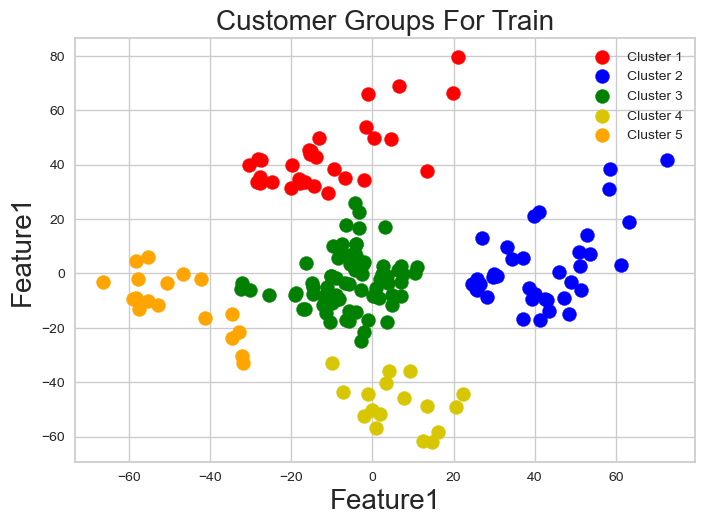

In [112]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.scatter(X_train.iloc[y_pred_train == 4, 0], X_train.iloc[y_pred_train == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature1',fontsize=20)
plt.legend()
plt.show()

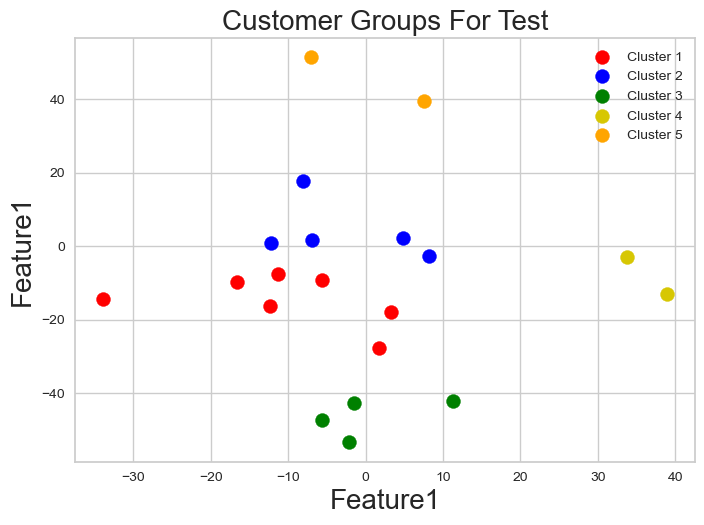

In [113]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.scatter(X_test.iloc[y_pred_test == 4, 0], X_test.iloc[y_pred_test == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature1',fontsize=20)
plt.legend()
plt.show()

Conclusion The best way to segment customers for data feature is Gender Annual Income (k$) small inertia 11930.928927429595 segment customers to 4 cluster

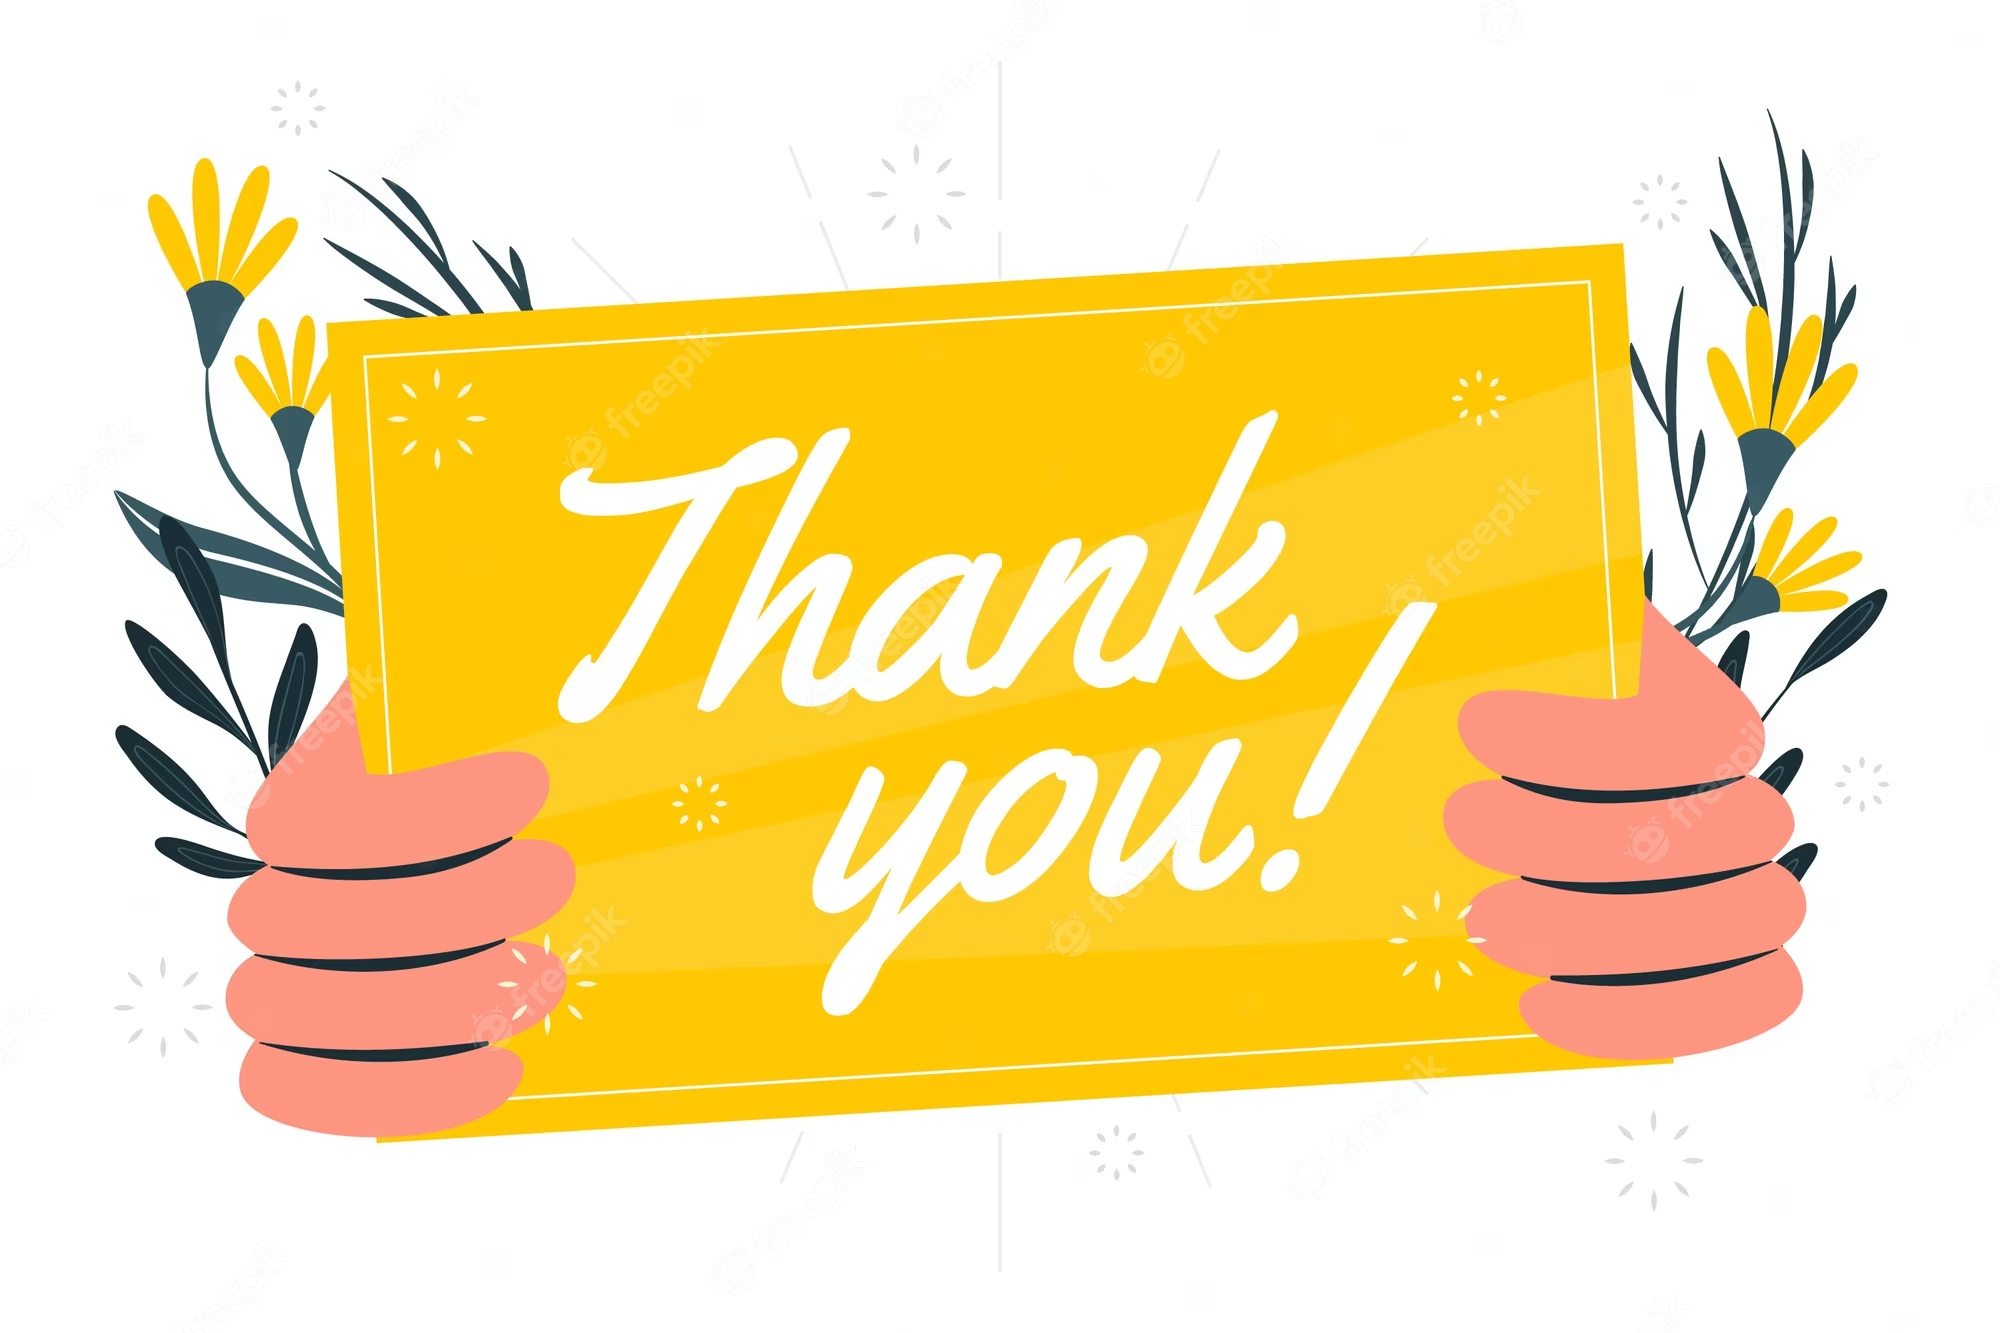